In [1]:
import pandas as pd 
import numpy as np 
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [2]:
# nilf = not in labor force

In [3]:
multi_act = pd.read_csv("ATUS DATA 03-19/atus_activity_0319.dat", 
                        dtype= {"TRCODEP": object, "TRTIER1P": object, "TRTIER2P": object}) #using 2003-2019 activity file
#multi_act

In [4]:
multi_resp = pd.read_csv("ATUS DATA 03-19/atus_resp_0319.dat")
#multi_resp

In [5]:
multi_merged = pd.merge(multi_act, multi_resp, on="TUCASEID")
multi_merged = multi_merged.filter(["TUCASEID","TUACTDUR24","TUCUMDUR","TRTIER1P","TRTIER2P","TRCODEP", 
                                    "TEWHERE","TELFS", "TUFNWGTP","TUSTARTTIM","TUSTOPTIME", "TUYEAR"])
#multi_merged

In [6]:
#TELFS = employment status 
multi_merged["TELFS"].unique()

array([2, 1, 4, 5, 3])

## Not In Labor Force Population

In [7]:
nilf_codes = [5] # 5 = not in labor force
multi_merged_nilf = multi_merged[multi_merged["TELFS"].isin(nilf_codes)]
multi_merged_nilf["TELFS"].unique()

array([5])

In [8]:
nilf_2003 = multi_merged_nilf[multi_merged_nilf["TUCASEID"].apply(str).str.startswith("2003")]
atus_2003_nilf_weight = nilf_2003.drop_duplicates(subset=["TUCASEID"])
atus_2003_nilf_weight = atus_2003_nilf_weight["TUFNWGTP"].sum()
atus_2003_nilf_weight

24651107709.08413

## 2003-2019 Residential - Not In Labor Force

In [9]:
#only residential location from 2003-2019
residential_location = [-1,1,3]
atus_multi_yr_res_nilf = multi_merged_nilf[multi_merged_nilf["TEWHERE"].isin(residential_location)]
#atus_multi_yr_res_nilf

In [10]:
#atus residential year seperation by nilf population 
atus_2003_res_nilf = atus_multi_yr_res_nilf[atus_multi_yr_res_nilf["TUCASEID"].apply(str).str.startswith("2003")]
atus_2004_res_nilf = atus_multi_yr_res_nilf[atus_multi_yr_res_nilf["TUCASEID"].apply(str).str.startswith("2004")]
atus_2005_res_nilf = atus_multi_yr_res_nilf[atus_multi_yr_res_nilf["TUCASEID"].apply(str).str.startswith("2005")]
atus_2006_res_nilf = atus_multi_yr_res_nilf[atus_multi_yr_res_nilf["TUCASEID"].apply(str).str.startswith("2006")]
atus_2007_res_nilf = atus_multi_yr_res_nilf[atus_multi_yr_res_nilf["TUCASEID"].apply(str).str.startswith("2007")]
atus_2008_res_nilf = atus_multi_yr_res_nilf[atus_multi_yr_res_nilf["TUCASEID"].apply(str).str.startswith("2008")]
atus_2009_res_nilf = atus_multi_yr_res_nilf[atus_multi_yr_res_nilf["TUCASEID"].apply(str).str.startswith("2009")]
atus_2010_res_nilf = atus_multi_yr_res_nilf[atus_multi_yr_res_nilf["TUCASEID"].apply(str).str.startswith("2010")]
atus_2011_res_nilf = atus_multi_yr_res_nilf[atus_multi_yr_res_nilf["TUCASEID"].apply(str).str.startswith("2011")]
atus_2012_res_nilf = atus_multi_yr_res_nilf[atus_multi_yr_res_nilf["TUCASEID"].apply(str).str.startswith("2012")]
atus_2013_res_nilf = atus_multi_yr_res_nilf[atus_multi_yr_res_nilf["TUCASEID"].apply(str).str.startswith("2013")]
atus_2014_res_nilf = atus_multi_yr_res_nilf[atus_multi_yr_res_nilf["TUCASEID"].apply(str).str.startswith("2014")]
atus_2015_res_nilf = atus_multi_yr_res_nilf[atus_multi_yr_res_nilf["TUCASEID"].apply(str).str.startswith("2015")]
atus_2016_res_nilf = atus_multi_yr_res_nilf[atus_multi_yr_res_nilf["TUCASEID"].apply(str).str.startswith("2016")]
atus_2017_res_nilf = atus_multi_yr_res_nilf[atus_multi_yr_res_nilf["TUCASEID"].apply(str).str.startswith("2017")]
atus_2018_res_nilf = atus_multi_yr_res_nilf[atus_multi_yr_res_nilf["TUCASEID"].apply(str).str.startswith("2018")]
atus_2019_res_nilf = atus_multi_yr_res_nilf[atus_multi_yr_res_nilf["TUCASEID"].apply(str).str.startswith("2019")]
#atus_2003_res_nilf

### 2003 All Residential Activities - Not In Labor Force Population

In [11]:
atus_2003_all_res_nilf = atus_2003_res_nilf.groupby(["TUCASEID"]).sum().filter(["TUCASEID", "TUACTDUR24"])
#atus_2003_all_res_nilf

In [12]:
atus_2003_all_res_nilf_merge = pd.merge(atus_2003_all_res_nilf, multi_resp, on= "TUCASEID").filter(["TUCASEID","TUACTDUR24","TUFNWGTP"])
#atus_2003_all_res_nilf_merge

In [13]:
atus_2003_all_res_nilf_merge["Multiplied Weight"] = atus_2003_all_res_nilf_merge["TUACTDUR24"] * atus_2003_all_res_nilf_merge["TUFNWGTP"]
#atus_2003_all_res_nilf_merge

In [14]:
atus_2003_all_res_nilf_multiplied_weight = atus_2003_all_res_nilf_merge["Multiplied Weight"].sum()
atus_2003_all_res_nilf_multiplied_weight

30318719295454.375

In [15]:
nilf_2003 = multi_merged_nilf[multi_merged_nilf["TUCASEID"].apply(str).str.startswith("2003")]
atus_2003_nilf_weight = nilf_2003.drop_duplicates(subset=["TUCASEID"])
atus_2003_nilf_weight = atus_2003_nilf_weight["TUFNWGTP"].sum()
atus_2003_nilf_weight

24651107709.08413

In [16]:
all_act_2003_res_nilf_hpd = atus_2003_all_res_nilf_multiplied_weight / atus_2003_nilf_weight / 60
all_act_2003_res_nilf_hpd

20.49855098687356

### 2004 All Residential Activities - Not In Labor Force Population

In [17]:
atus_2004_all_res_nilf = atus_2004_res_nilf.groupby(["TUCASEID"]).sum().filter(["TUCASEID", "TUACTDUR24"])
#atus_2004_all_res_nilf

In [18]:
atus_2004_all_res_nilf_merge = pd.merge(atus_2004_all_res_nilf, multi_resp, on= "TUCASEID").filter(["TUCASEID","TUACTDUR24","TUFNWGTP"])
atus_2004_all_res_nilf_merge["Multiplied Weight"] = atus_2004_all_res_nilf_merge["TUACTDUR24"] * atus_2004_all_res_nilf_merge["TUFNWGTP"]
#atus_2004_all_res_nilf_merge

In [19]:
nilf_2004 = multi_merged_nilf[multi_merged_nilf["TUCASEID"].apply(str).str.startswith("2004")]
atus_2004_nilf_weight = nilf_2004.drop_duplicates(subset=["TUCASEID"])
atus_2004_nilf_weight = atus_2004_nilf_weight["TUFNWGTP"].sum()

atus_2004_all_res_nilf_multiplied_weight = atus_2004_all_res_nilf_merge["Multiplied Weight"].sum()

In [20]:
all_act_2004_res_nilf_hpd = atus_2004_all_res_nilf_multiplied_weight / atus_2004_nilf_weight / 60
all_act_2004_res_nilf_hpd

20.555295765778034

### 2005 All Residential Activities - Not In Labor Force Population

In [21]:
atus_2005_all_res_nilf = atus_2005_res_nilf.groupby(["TUCASEID"]).sum().filter(["TUCASEID", "TUACTDUR24"])
#atus_2005_all_res_nilf

In [22]:
atus_2005_all_res_nilf_merge = pd.merge(atus_2005_all_res_nilf, multi_resp, on= "TUCASEID").filter(["TUCASEID","TUACTDUR24","TUFNWGTP"])
atus_2005_all_res_nilf_merge["Multiplied Weight"] = atus_2005_all_res_nilf_merge["TUACTDUR24"] * atus_2005_all_res_nilf_merge["TUFNWGTP"]
#atus_2005_all_res_nilf_merge

In [23]:
nilf_2005 = multi_merged_nilf[multi_merged_nilf["TUCASEID"].apply(str).str.startswith("2005")]
atus_2005_nilf_weight = nilf_2005.drop_duplicates(subset=["TUCASEID"])
atus_2005_nilf_weight = atus_2005_nilf_weight["TUFNWGTP"].sum()

atus_2005_all_res_nilf_multiplied_weight = atus_2005_all_res_nilf_merge["Multiplied Weight"].sum()

In [24]:
all_act_2005_res_nilf_hpd = atus_2005_all_res_nilf_multiplied_weight / atus_2005_nilf_weight / 60
all_act_2005_res_nilf_hpd

20.471361811362193

### 2006 All Residential Activities - Not In Labor Force Population

In [25]:
atus_2006_all_res_nilf = atus_2006_res_nilf.groupby(["TUCASEID"]).sum().filter(["TUCASEID", "TUACTDUR24"])
#atus_2006_all_res_nilf

In [26]:
atus_2006_all_res_nilf_merge = pd.merge(atus_2006_all_res_nilf, multi_resp, on= "TUCASEID").filter(["TUCASEID","TUACTDUR24","TUFNWGTP"])
atus_2006_all_res_nilf_merge["Multiplied Weight"] = atus_2006_all_res_nilf_merge["TUACTDUR24"] * atus_2006_all_res_nilf_merge["TUFNWGTP"]
#atus_2006_all_res_nilf_merge

In [27]:
nilf_2006 = multi_merged_nilf[multi_merged_nilf["TUCASEID"].apply(str).str.startswith("2006")]
atus_2006_nilf_weight = nilf_2006.drop_duplicates(subset=["TUCASEID"])
atus_2006_nilf_weight = atus_2006_nilf_weight["TUFNWGTP"].sum()

atus_2006_all_res_nilf_multiplied_weight = atus_2006_all_res_nilf_merge["Multiplied Weight"].sum()

In [28]:
all_act_2006_res_nilf_hpd = atus_2006_all_res_nilf_multiplied_weight / atus_2006_nilf_weight / 60
all_act_2006_res_nilf_hpd

20.533608562987535

### 2007 All Residential Activities - Not In Labor Force Population

In [29]:
atus_2007_all_res_nilf = atus_2007_res_nilf.groupby(["TUCASEID"]).sum().filter(["TUCASEID", "TUACTDUR24"])
#atus_2007_all_res_nilf

In [30]:
atus_2007_all_res_nilf_merge = pd.merge(atus_2007_all_res_nilf, multi_resp, on= "TUCASEID").filter(["TUCASEID","TUACTDUR24","TUFNWGTP"])
atus_2007_all_res_nilf_merge["Multiplied Weight"] = atus_2007_all_res_nilf_merge["TUACTDUR24"] * atus_2007_all_res_nilf_merge["TUFNWGTP"]
#atus_2007_all_res_nilf_merge

In [31]:
nilf_2007 = multi_merged_nilf[multi_merged_nilf["TUCASEID"].apply(str).str.startswith("2007")]
atus_2007_nilf_weight = nilf_2007.drop_duplicates(subset=["TUCASEID"])
atus_2007_nilf_weight = atus_2007_nilf_weight["TUFNWGTP"].sum()

atus_2007_all_res_nilf_multiplied_weight = atus_2007_all_res_nilf_merge["Multiplied Weight"].sum()

In [32]:
all_act_2007_res_nilf_hpd = atus_2007_all_res_nilf_multiplied_weight / atus_2007_nilf_weight / 60
all_act_2007_res_nilf_hpd

20.494393301076492

### 2008 All Residential Activities - Not In Labor Force Population

In [33]:
atus_2008_all_res_nilf = atus_2008_res_nilf.groupby(["TUCASEID"]).sum().filter(["TUCASEID", "TUACTDUR24"])
#atus_2008_all_res_nilf

In [34]:
atus_2008_all_res_nilf_merge = pd.merge(atus_2008_all_res_nilf, multi_resp, on= "TUCASEID").filter(["TUCASEID","TUACTDUR24","TUFNWGTP"])
atus_2008_all_res_nilf_merge["Multiplied Weight"] = atus_2008_all_res_nilf_merge["TUACTDUR24"] * atus_2008_all_res_nilf_merge["TUFNWGTP"]
#atus_2008_all_res_nilf_merge

In [35]:
nilf_2008 = multi_merged_nilf[multi_merged_nilf["TUCASEID"].apply(str).str.startswith("2008")]
atus_2008_nilf_weight = nilf_2008.drop_duplicates(subset=["TUCASEID"])
atus_2008_nilf_weight = atus_2008_nilf_weight["TUFNWGTP"].sum()

atus_2008_all_res_nilf_multiplied_weight = atus_2008_all_res_nilf_merge["Multiplied Weight"].sum()

In [36]:
all_act_2008_res_nilf_hpd = atus_2008_all_res_nilf_multiplied_weight / atus_2008_nilf_weight / 60
all_act_2008_res_nilf_hpd

20.667992454033268

### 2009 All Residential Activities - Not In Labor Force Population

In [37]:
atus_2009_all_res_nilf = atus_2009_res_nilf.groupby(["TUCASEID"]).sum().filter(["TUCASEID", "TUACTDUR24"])
#atus_2009_all_res_nilf

In [38]:
atus_2009_all_res_nilf_merge = pd.merge(atus_2009_all_res_nilf, multi_resp, on= "TUCASEID").filter(["TUCASEID","TUACTDUR24","TUFNWGTP"])
atus_2009_all_res_nilf_merge["Multiplied Weight"] = atus_2009_all_res_nilf_merge["TUACTDUR24"] * atus_2009_all_res_nilf_merge["TUFNWGTP"]
#atus_2009_all_res_nilf_merge

In [39]:
nilf_2009 = multi_merged_nilf[multi_merged_nilf["TUCASEID"].apply(str).str.startswith("2009")]
atus_2009_nilf_weight = nilf_2009.drop_duplicates(subset=["TUCASEID"])
atus_2009_nilf_weight = atus_2009_nilf_weight["TUFNWGTP"].sum()

atus_2009_all_res_nilf_multiplied_weight = atus_2009_all_res_nilf_merge["Multiplied Weight"].sum()

In [40]:
all_act_2009_res_nilf_hpd = atus_2009_all_res_nilf_multiplied_weight / atus_2009_nilf_weight / 60
all_act_2009_res_nilf_hpd

20.684682804236445

### 2010 All Residential Activities - Not In Labor Force Population

In [41]:
atus_2010_all_res_nilf = atus_2010_res_nilf.groupby(["TUCASEID"]).sum().filter(["TUCASEID", "TUACTDUR24"])
#atus_2010_all_res_nilf

In [42]:
atus_2010_all_res_nilf_merge = pd.merge(atus_2010_all_res_nilf, multi_resp, on= "TUCASEID").filter(["TUCASEID","TUACTDUR24","TUFNWGTP"])
atus_2010_all_res_nilf_merge["Multiplied Weight"] = atus_2010_all_res_nilf_merge["TUACTDUR24"] * atus_2010_all_res_nilf_merge["TUFNWGTP"]
#atus_2010_all_res_nilf_merge

In [43]:
nilf_2010 = multi_merged_nilf[multi_merged_nilf["TUCASEID"].apply(str).str.startswith("2010")]
atus_2010_nilf_weight = nilf_2010.drop_duplicates(subset=["TUCASEID"])
atus_2010_nilf_weight = atus_2010_nilf_weight["TUFNWGTP"].sum()

atus_2010_all_res_nilf_multiplied_weight = atus_2010_all_res_nilf_merge["Multiplied Weight"].sum()

In [44]:
all_act_2010_res_nilf_hpd = atus_2010_all_res_nilf_multiplied_weight / atus_2010_nilf_weight / 60
all_act_2010_res_nilf_hpd

20.623825246843463

### 2011 All Residential Activities - Not In Labor Force Population

In [45]:
atus_2011_all_res_nilf = atus_2011_res_nilf.groupby(["TUCASEID"]).sum().filter(["TUCASEID", "TUACTDUR24"])
#atus_2011_all_res_nilf

In [46]:
atus_2011_all_res_nilf_merge = pd.merge(atus_2011_all_res_nilf, multi_resp, on= "TUCASEID").filter(["TUCASEID","TUACTDUR24","TUFNWGTP"])
atus_2011_all_res_nilf_merge["Multiplied Weight"] = atus_2011_all_res_nilf_merge["TUACTDUR24"] * atus_2011_all_res_nilf_merge["TUFNWGTP"]
#atus_2011_all_res_nilf_merge

In [47]:
atus_2011_all_res_nilf_merge = pd.merge(atus_2011_all_res_nilf, multi_resp, on= "TUCASEID").filter(["TUCASEID","TUACTDUR24","TUFNWGTP"])
atus_2011_all_res_nilf_merge["Multiplied Weight"] = atus_2011_all_res_nilf_merge["TUACTDUR24"] * atus_2011_all_res_nilf_merge["TUFNWGTP"]
#atus_2011_all_res_nilf_merge

In [48]:
nilf_2011 = multi_merged_nilf[multi_merged_nilf["TUCASEID"].apply(str).str.startswith("2011")]
atus_2011_nilf_weight = nilf_2011.drop_duplicates(subset=["TUCASEID"])
atus_2011_nilf_weight = atus_2011_nilf_weight["TUFNWGTP"].sum()

atus_2011_all_res_nilf_multiplied_weight = atus_2011_all_res_nilf_merge["Multiplied Weight"].sum()

In [49]:
all_act_2011_res_nilf_hpd = atus_2011_all_res_nilf_multiplied_weight / atus_2011_nilf_weight / 60
all_act_2011_res_nilf_hpd

20.54094889994446

### 2012 All Residential Activities - Not In Labor Force Population

In [50]:
atus_2012_all_res_nilf = atus_2012_res_nilf.groupby(["TUCASEID"]).sum().filter(["TUCASEID", "TUACTDUR24"])
#atus_2012_all_res_nilf

In [51]:
atus_2012_all_res_nilf_merge = pd.merge(atus_2012_all_res_nilf, multi_resp, on= "TUCASEID").filter(["TUCASEID","TUACTDUR24","TUFNWGTP"])
atus_2012_all_res_nilf_merge["Multiplied Weight"] = atus_2012_all_res_nilf_merge["TUACTDUR24"] * atus_2012_all_res_nilf_merge["TUFNWGTP"]
#atus_2012_all_res_nilf_merge

In [52]:
atus_2012_all_res_nilf_merge = pd.merge(atus_2012_all_res_nilf, multi_resp, on= "TUCASEID").filter(["TUCASEID","TUACTDUR24","TUFNWGTP"])
atus_2012_all_res_nilf_merge["Multiplied Weight"] = atus_2012_all_res_nilf_merge["TUACTDUR24"] * atus_2012_all_res_nilf_merge["TUFNWGTP"]
#atus_2012_all_res_nilf_merge

In [53]:
nilf_2012 = multi_merged_nilf[multi_merged_nilf["TUCASEID"].apply(str).str.startswith("2012")]
atus_2012_nilf_weight = nilf_2012.drop_duplicates(subset=["TUCASEID"])
atus_2012_nilf_weight = atus_2012_nilf_weight["TUFNWGTP"].sum()

atus_2012_all_res_nilf_multiplied_weight = atus_2012_all_res_nilf_merge["Multiplied Weight"].sum()

In [54]:
all_act_2012_res_nilf_hpd = atus_2012_all_res_nilf_multiplied_weight / atus_2012_nilf_weight / 60
all_act_2012_res_nilf_hpd

20.54296320099

### 2013 All Residential Activities -Not In Labor Force Population

In [55]:
atus_2013_all_res_nilf = atus_2013_res_nilf.groupby(["TUCASEID"]).sum().filter(["TUCASEID", "TUACTDUR24"])
#atus_2013_all_res_nilf

In [56]:
atus_2013_all_res_nilf_merge = pd.merge(atus_2013_all_res_nilf, multi_resp, on= "TUCASEID").filter(["TUCASEID","TUACTDUR24","TUFNWGTP"])
atus_2013_all_res_nilf_merge["Multiplied Weight"] = atus_2013_all_res_nilf_merge["TUACTDUR24"] * atus_2013_all_res_nilf_merge["TUFNWGTP"]
#atus_2013_all_res_nilf_merge

In [57]:
atus_2013_all_res_nilf_merge = pd.merge(atus_2013_all_res_nilf, multi_resp, on= "TUCASEID").filter(["TUCASEID","TUACTDUR24","TUFNWGTP"])
atus_2013_all_res_nilf_merge["Multiplied Weight"] = atus_2013_all_res_nilf_merge["TUACTDUR24"] * atus_2013_all_res_nilf_merge["TUFNWGTP"]
#atus_2013_all_res_nilf_merge

In [58]:
nilf_2013 = multi_merged_nilf[multi_merged_nilf["TUCASEID"].apply(str).str.startswith("2013")]
atus_2013_nilf_weight = nilf_2013.drop_duplicates(subset=["TUCASEID"])
atus_2013_nilf_weight = atus_2013_nilf_weight["TUFNWGTP"].sum()

atus_2013_all_res_nilf_multiplied_weight = atus_2013_all_res_nilf_merge["Multiplied Weight"].sum()

In [59]:
all_act_2013_res_nilf_hpd = atus_2013_all_res_nilf_multiplied_weight / atus_2013_nilf_weight / 60
all_act_2013_res_nilf_hpd

20.60259744072299

### 2014 All Residential Activities - Not In Labor Force Population

In [60]:
atus_2014_all_res_nilf = atus_2014_res_nilf.groupby(["TUCASEID"]).sum().filter(["TUCASEID", "TUACTDUR24"])
#atus_2014_all_res_nilf

In [61]:
atus_2014_all_res_nilf_merge = pd.merge(atus_2014_all_res_nilf, multi_resp, on= "TUCASEID").filter(["TUCASEID","TUACTDUR24","TUFNWGTP"])
atus_2014_all_res_nilf_merge["Multiplied Weight"] = atus_2014_all_res_nilf_merge["TUACTDUR24"] * atus_2014_all_res_nilf_merge["TUFNWGTP"]
#atus_2014_all_res_nilf_merge

In [62]:
atus_2014_all_res_nilf_merge = pd.merge(atus_2014_all_res_nilf, multi_resp, on= "TUCASEID").filter(["TUCASEID","TUACTDUR24","TUFNWGTP"])
atus_2014_all_res_nilf_merge["Multiplied Weight"] = atus_2014_all_res_nilf_merge["TUACTDUR24"] * atus_2014_all_res_nilf_merge["TUFNWGTP"]
#atus_2014_all_res_nilf_merge

In [63]:
nilf_2014 = multi_merged_nilf[multi_merged_nilf["TUCASEID"].apply(str).str.startswith("2014")]
atus_2014_nilf_weight = nilf_2014.drop_duplicates(subset=["TUCASEID"])
atus_2014_nilf_weight = atus_2014_nilf_weight["TUFNWGTP"].sum()

atus_2014_all_res_nilf_multiplied_weight = atus_2014_all_res_nilf_merge["Multiplied Weight"].sum()

In [64]:
all_act_2014_res_nilf_hpd = atus_2014_all_res_nilf_multiplied_weight / atus_2014_nilf_weight / 60
all_act_2014_res_nilf_hpd

20.678103531923757

### 2015 All Residential Activities - Not In Labor Force Population

In [65]:
atus_2015_all_res_nilf = atus_2015_res_nilf.groupby(["TUCASEID"]).sum().filter(["TUCASEID", "TUACTDUR24"])
#atus_2015_all_res_nilf

In [66]:
atus_2015_all_res_nilf_merge = pd.merge(atus_2015_all_res_nilf, multi_resp, on= "TUCASEID").filter(["TUCASEID","TUACTDUR24","TUFNWGTP"])
atus_2015_all_res_nilf_merge["Multiplied Weight"] = atus_2015_all_res_nilf_merge["TUACTDUR24"] * atus_2015_all_res_nilf_merge["TUFNWGTP"]
#atus_2015_all_res_nilf_merge

In [67]:
atus_2015_all_res_nilf_merge = pd.merge(atus_2015_all_res_nilf, multi_resp, on= "TUCASEID").filter(["TUCASEID","TUACTDUR24","TUFNWGTP"])
atus_2015_all_res_nilf_merge["Multiplied Weight"] = atus_2015_all_res_nilf_merge["TUACTDUR24"] * atus_2015_all_res_nilf_merge["TUFNWGTP"]
#atus_2015_all_res_nilf_merge

In [68]:
nilf_2015 = multi_merged_nilf[multi_merged_nilf["TUCASEID"].apply(str).str.startswith("2015")]
atus_2015_nilf_weight = nilf_2015.drop_duplicates(subset=["TUCASEID"])
atus_2015_nilf_weight = atus_2015_nilf_weight["TUFNWGTP"].sum()

atus_2015_all_res_nilf_multiplied_weight = atus_2015_all_res_nilf_merge["Multiplied Weight"].sum()

In [69]:
all_act_2015_res_nilf_hpd = atus_2015_all_res_nilf_multiplied_weight / atus_2015_nilf_weight / 60
all_act_2015_res_nilf_hpd

20.72775863647949

### 2016 All Residential Activities - Not In Labor ForcePopulation

In [70]:
atus_2016_all_res_nilf = atus_2016_res_nilf.groupby(["TUCASEID"]).sum().filter(["TUCASEID", "TUACTDUR24"])
#atus_2016_all_res_nilf

In [71]:
atus_2016_all_res_nilf_merge = pd.merge(atus_2016_all_res_nilf, multi_resp, on= "TUCASEID").filter(["TUCASEID","TUACTDUR24","TUFNWGTP"])
atus_2016_all_res_nilf_merge["Multiplied Weight"] = atus_2016_all_res_nilf_merge["TUACTDUR24"] * atus_2016_all_res_nilf_merge["TUFNWGTP"]
#atus_2016_all_res_nilf_merge

In [72]:
atus_2016_all_res_nilf_merge = pd.merge(atus_2016_all_res_nilf, multi_resp, on= "TUCASEID").filter(["TUCASEID","TUACTDUR24","TUFNWGTP"])
atus_2016_all_res_nilf_merge["Multiplied Weight"] = atus_2016_all_res_nilf_merge["TUACTDUR24"] * atus_2016_all_res_nilf_merge["TUFNWGTP"]
#atus_2016_all_res_nilf_merge

In [73]:
nilf_2016 = multi_merged_nilf[multi_merged_nilf["TUCASEID"].apply(str).str.startswith("2016")]
atus_2016_nilf_weight = nilf_2016.drop_duplicates(subset=["TUCASEID"])
atus_2016_nilf_weight = atus_2016_nilf_weight["TUFNWGTP"].sum()

atus_2016_all_res_nilf_multiplied_weight = atus_2016_all_res_nilf_merge["Multiplied Weight"].sum()

In [74]:
all_act_2016_res_nilf_hpd = atus_2016_all_res_nilf_multiplied_weight / atus_2016_nilf_weight / 60
all_act_2016_res_nilf_hpd

20.547968999724965

### 2017 All Residential Activities - Not In Labor Force Population

In [75]:
atus_2017_all_res_nilf = atus_2017_res_nilf.groupby(["TUCASEID"]).sum().filter(["TUCASEID", "TUACTDUR24"])
#atus_2017_all_res_nilf

In [76]:
atus_2017_all_res_nilf_merge = pd.merge(atus_2017_all_res_nilf, multi_resp, on= "TUCASEID").filter(["TUCASEID","TUACTDUR24","TUFNWGTP"])
atus_2017_all_res_nilf_merge["Multiplied Weight"] = atus_2017_all_res_nilf_merge["TUACTDUR24"] * atus_2017_all_res_nilf_merge["TUFNWGTP"]
#atus_2017_all_res_nilf_merge

In [77]:
atus_2017_all_res_nilf_merge = pd.merge(atus_2017_all_res_nilf, multi_resp, on= "TUCASEID").filter(["TUCASEID","TUACTDUR24","TUFNWGTP"])
atus_2017_all_res_nilf_merge["Multiplied Weight"] = atus_2017_all_res_nilf_merge["TUACTDUR24"] * atus_2017_all_res_nilf_merge["TUFNWGTP"]
#atus_2017_all_res_nilf_merge

In [78]:
nilf_2017 = multi_merged_nilf[multi_merged_nilf["TUCASEID"].apply(str).str.startswith("2017")]
atus_2017_nilf_weight = nilf_2017.drop_duplicates(subset=["TUCASEID"])
atus_2017_nilf_weight = atus_2017_nilf_weight["TUFNWGTP"].sum()

atus_2017_all_res_nilf_multiplied_weight = atus_2017_all_res_nilf_merge["Multiplied Weight"].sum()

In [79]:
all_act_2017_res_nilf_hpd = atus_2017_all_res_nilf_multiplied_weight / atus_2017_nilf_weight / 60
all_act_2017_res_nilf_hpd

20.69626127534722

### 2018 All Residential Activities - Not In Labor Force Population

In [80]:
atus_2018_all_res_nilf = atus_2018_res_nilf.groupby(["TUCASEID"]).sum().filter(["TUCASEID", "TUACTDUR24"])
#atus_2018_all_res_nilf

In [81]:
atus_2018_all_res_nilf_merge = pd.merge(atus_2018_all_res_nilf, multi_resp, on= "TUCASEID").filter(["TUCASEID","TUACTDUR24","TUFNWGTP"])
atus_2018_all_res_nilf_merge["Multiplied Weight"] = atus_2018_all_res_nilf_merge["TUACTDUR24"] * atus_2018_all_res_nilf_merge["TUFNWGTP"]
#atus_2018_all_res_nilf_merge

In [82]:
atus_2018_all_res_nilf_merge = pd.merge(atus_2018_all_res_nilf, multi_resp, on= "TUCASEID").filter(["TUCASEID","TUACTDUR24","TUFNWGTP"])
atus_2018_all_res_nilf_merge["Multiplied Weight"] = atus_2018_all_res_nilf_merge["TUACTDUR24"] * atus_2018_all_res_nilf_merge["TUFNWGTP"]
#atus_2018_all_res_nilf_merge

In [83]:
nilf_2018 = multi_merged_nilf[multi_merged_nilf["TUCASEID"].apply(str).str.startswith("2018")]
atus_2018_nilf_weight = nilf_2018.drop_duplicates(subset=["TUCASEID"])
atus_2018_nilf_weight = atus_2018_nilf_weight["TUFNWGTP"].sum()

atus_2018_all_res_nilf_multiplied_weight = atus_2018_all_res_nilf_merge["Multiplied Weight"].sum()

In [84]:
all_act_2018_res_nilf_hpd = atus_2018_all_res_nilf_multiplied_weight / atus_2018_nilf_weight / 60
all_act_2018_res_nilf_hpd

20.64266497237559

### 2019 All Residential Activities - Not In Labor Force Population

In [85]:
atus_2019_all_res_nilf = atus_2019_res_nilf.groupby(["TUCASEID"]).sum().filter(["TUCASEID", "TUACTDUR24"])
#atus_2019_all_res_nilf

In [86]:
atus_2019_all_res_nilf_merge = pd.merge(atus_2019_all_res_nilf, multi_resp, on= "TUCASEID").filter(["TUCASEID","TUACTDUR24","TUFNWGTP"])
atus_2019_all_res_nilf_merge["Multiplied Weight"] = atus_2019_all_res_nilf_merge["TUACTDUR24"] * atus_2019_all_res_nilf_merge["TUFNWGTP"]
#atus_2019_all_res_nilf_merge

In [87]:
atus_2019_all_res_nilf_merge = pd.merge(atus_2019_all_res_nilf, multi_resp, on= "TUCASEID").filter(["TUCASEID","TUACTDUR24","TUFNWGTP"])
atus_2019_all_res_nilf_merge["Multiplied Weight"] = atus_2019_all_res_nilf_merge["TUACTDUR24"] * atus_2019_all_res_nilf_merge["TUFNWGTP"]
#atus_2019_all_res_nilf_merge

In [88]:
nilf_2019 = multi_merged_nilf[multi_merged_nilf["TUCASEID"].apply(str).str.startswith("2019")]
atus_2019_nilf_weight = nilf_2019.drop_duplicates(subset=["TUCASEID"])
atus_2019_nilf_weight = atus_2019_nilf_weight["TUFNWGTP"].sum()

atus_2019_all_res_nilf_multiplied_weight = atus_2019_all_res_nilf_merge["Multiplied Weight"].sum()

In [89]:
all_act_2019_res_nilf_hpd = atus_2019_all_res_nilf_multiplied_weight / atus_2019_nilf_weight / 60
all_act_2019_res_nilf_hpd

20.64263822129432

### Regresssion: All Residential Activity - Not In Labor Force

#### 2003 -2012 Regression 

In [90]:
year = np.array([2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010,2011,2012]).reshape((-1, 1))
activity_hours_per_day = np.array([all_act_2003_res_nilf_hpd, all_act_2004_res_nilf_hpd, all_act_2005_res_nilf_hpd,
                                   all_act_2006_res_nilf_hpd, all_act_2007_res_nilf_hpd, all_act_2008_res_nilf_hpd,
                                   all_act_2009_res_nilf_hpd, all_act_2010_res_nilf_hpd, all_act_2011_res_nilf_hpd,
                                   all_act_2012_res_nilf_hpd]).reshape((-1, 1))

activity_hours_per_yr = [i * 365 for i in activity_hours_per_day]
#activity_hours_per_yr

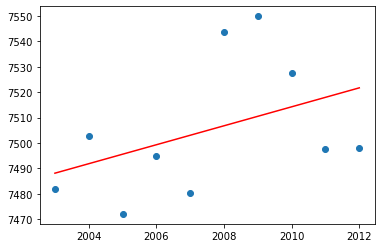

In [91]:
x = year
y = activity_hours_per_yr
x, y = np.array(x), np.array(y)

model = LinearRegression().fit(x, y)

y_pred = model.predict(x)  

plt.scatter(x, y)
plt.plot(x, y_pred, color='red')
plt.show()

In [92]:
coefficient_of_determination = model.score(x,y) #R sqaure value 
coefficient_of_determination

0.17785291977965845

In [93]:
all_act_2012_res_nilf_slope = model.coef_
all_act_2012_res_nilf_slope

array([[3.73499173]])

#### 2003-2019 Regression

In [94]:
year = np.array([2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010,2011,2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019]).reshape((-1, 1))
activity_hours_per_day = np.array([all_act_2003_res_nilf_hpd, all_act_2004_res_nilf_hpd, all_act_2005_res_nilf_hpd,
                                   all_act_2006_res_nilf_hpd, all_act_2007_res_nilf_hpd, all_act_2008_res_nilf_hpd,
                                   all_act_2009_res_nilf_hpd, all_act_2010_res_nilf_hpd, all_act_2011_res_nilf_hpd,
                                   all_act_2012_res_nilf_hpd, all_act_2013_res_nilf_hpd, all_act_2014_res_nilf_hpd,
                                   all_act_2015_res_nilf_hpd, all_act_2016_res_nilf_hpd, all_act_2017_res_nilf_hpd,
                                   all_act_2018_res_nilf_hpd, all_act_2019_res_nilf_hpd]).reshape((-1, 1))

activity_hours_per_yr = [i * 365 for i in activity_hours_per_day]
#activity_hours_per_yr

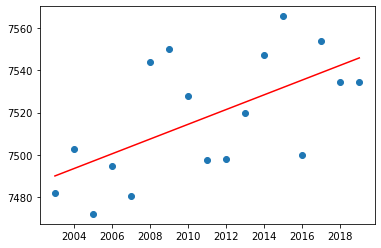

In [95]:
x = year
y = activity_hours_per_yr
x, y = np.array(x), np.array(y)

model = LinearRegression().fit(x, y)

y_pred = model.predict(x)  

plt.scatter(x, y)
plt.plot(x, y_pred, color='red')
plt.show()

In [96]:
coefficient_of_determination = model.score(x,y) #R sqaure value 
coefficient_of_determination

0.36843285931783165

In [97]:
all_act_2019_res_nilf_slope = model.coef_
all_act_2019_res_nilf_slope

array([[3.49276649]])

### 2003-2019 NonResidential - Not In Labor Force

In [98]:
#non-residential = 2,4,5,6,7,8,9,10,11,30,31,32

In [99]:
nonresidential_location = [2,4,5,6,7,8,9,10,11,30,31,32]
atus_multi_yr_nonres_nilf = multi_merged_nilf[multi_merged_nilf["TEWHERE"].isin(nonresidential_location)]
#atus_multi_yr_res_nilf

In [100]:
atus_2003_nonres_nilf = atus_multi_yr_nonres_nilf[atus_multi_yr_nonres_nilf["TUCASEID"].apply(str).str.startswith("2003")]
atus_2004_nonres_nilf = atus_multi_yr_nonres_nilf[atus_multi_yr_nonres_nilf["TUCASEID"].apply(str).str.startswith("2004")]
atus_2005_nonres_nilf = atus_multi_yr_nonres_nilf[atus_multi_yr_nonres_nilf["TUCASEID"].apply(str).str.startswith("2005")]
atus_2006_nonres_nilf = atus_multi_yr_nonres_nilf[atus_multi_yr_nonres_nilf["TUCASEID"].apply(str).str.startswith("2006")]
atus_2007_nonres_nilf = atus_multi_yr_nonres_nilf[atus_multi_yr_nonres_nilf["TUCASEID"].apply(str).str.startswith("2007")]
atus_2008_nonres_nilf = atus_multi_yr_nonres_nilf[atus_multi_yr_nonres_nilf["TUCASEID"].apply(str).str.startswith("2008")]
atus_2009_nonres_nilf = atus_multi_yr_nonres_nilf[atus_multi_yr_nonres_nilf["TUCASEID"].apply(str).str.startswith("2009")]
atus_2010_nonres_nilf = atus_multi_yr_nonres_nilf[atus_multi_yr_nonres_nilf["TUCASEID"].apply(str).str.startswith("2010")]
atus_2011_nonres_nilf = atus_multi_yr_nonres_nilf[atus_multi_yr_nonres_nilf["TUCASEID"].apply(str).str.startswith("2011")]
atus_2012_nonres_nilf = atus_multi_yr_nonres_nilf[atus_multi_yr_nonres_nilf["TUCASEID"].apply(str).str.startswith("2012")]
atus_2013_nonres_nilf = atus_multi_yr_nonres_nilf[atus_multi_yr_nonres_nilf["TUCASEID"].apply(str).str.startswith("2013")]
atus_2014_nonres_nilf = atus_multi_yr_nonres_nilf[atus_multi_yr_nonres_nilf["TUCASEID"].apply(str).str.startswith("2014")]
atus_2015_nonres_nilf = atus_multi_yr_nonres_nilf[atus_multi_yr_nonres_nilf["TUCASEID"].apply(str).str.startswith("2015")]
atus_2016_nonres_nilf = atus_multi_yr_nonres_nilf[atus_multi_yr_nonres_nilf["TUCASEID"].apply(str).str.startswith("2016")]
atus_2017_nonres_nilf = atus_multi_yr_nonres_nilf[atus_multi_yr_nonres_nilf["TUCASEID"].apply(str).str.startswith("2017")]
atus_2018_nonres_nilf = atus_multi_yr_nonres_nilf[atus_multi_yr_nonres_nilf["TUCASEID"].apply(str).str.startswith("2018")]
atus_2019_nonres_nilf = atus_multi_yr_nonres_nilf[atus_multi_yr_nonres_nilf["TUCASEID"].apply(str).str.startswith("2019")]
#atus_2003_nonres_nilf

### 2003 All Activities - NonResidential - Not In Labor Force

In [101]:
atus_2003_all_nonres_nilf = atus_2003_nonres_nilf.groupby(["TUCASEID"]).sum().filter(["TUCASEID", "TUACTDUR24"])
#atus_2003_all_nonres_nilf

In [102]:
atus_2003_all_nonres_nilf_merge = pd.merge(atus_2003_all_nonres_nilf, multi_resp, on= "TUCASEID").filter(["TUCASEID","TUACTDUR24","TUFNWGTP"])
#atus_2003_all_res_nilf_merge

In [103]:
atus_2003_all_nonres_nilf_merge["Multiplied Weight"]=atus_2003_all_nonres_nilf_merge["TUACTDUR24"]*atus_2003_all_nonres_nilf_merge["TUFNWGTP"]
#atus_2003_all_nonres_nilf_merge

In [104]:
atus_2003_all_nonres_nilf_multiplied_weight = atus_2003_all_nonres_nilf_merge["Multiplied Weight"].sum()
atus_2003_all_nonres_nilf_multiplied_weight

3650100451036.1094

In [105]:
all_act_2003_nonres_nilf_hpd = atus_2003_all_nonres_nilf_multiplied_weight / atus_2003_nilf_weight / 60
all_act_2003_nonres_nilf_hpd

2.4678407248551477

### 2004 All Activities - NonResidential - Not In Labor Force

In [106]:
atus_2004_all_nonres_nilf = atus_2004_nonres_nilf.groupby(["TUCASEID"]).sum().filter(["TUCASEID", "TUACTDUR24"])
#atus_2004_all_nonres_nilf

In [107]:
atus_2004_all_nonres_nilf_merge = pd.merge(atus_2004_all_nonres_nilf, multi_resp, on= "TUCASEID").filter(["TUCASEID","TUACTDUR24","TUFNWGTP"])
#atus_2004_all_res_nilf_merge

In [108]:
atus_2004_all_nonres_nilf_merge["Multiplied Weight"]=atus_2004_all_nonres_nilf_merge["TUACTDUR24"]*atus_2004_all_nonres_nilf_merge["TUFNWGTP"]

atus_2004_all_nonres_nilf_multiplied_weight = atus_2004_all_nonres_nilf_merge["Multiplied Weight"].sum()
atus_2004_all_nonres_nilf_multiplied_weight

3779756337832.336

In [109]:
all_act_2004_nonres_nilf_hpd = atus_2004_all_nonres_nilf_multiplied_weight / atus_2004_nilf_weight / 60
all_act_2004_nonres_nilf_hpd

2.4573571134365904

### 2005 All Activities - NonResidential - Not In Labor Force

In [110]:
atus_2005_all_nonres_nilf = atus_2005_nonres_nilf.groupby(["TUCASEID"]).sum().filter(["TUCASEID", "TUACTDUR24"])
#atus_2005_all_nonres_nilf

In [111]:
atus_2005_all_nonres_nilf_merge = pd.merge(atus_2005_all_nonres_nilf, multi_resp, on= "TUCASEID").filter(["TUCASEID","TUACTDUR24","TUFNWGTP"])
#atus_2005_all_res_nilf_merge

In [112]:
atus_2005_all_nonres_nilf_merge["Multiplied Weight"]=atus_2005_all_nonres_nilf_merge["TUACTDUR24"]*atus_2005_all_nonres_nilf_merge["TUFNWGTP"]

atus_2005_all_nonres_nilf_multiplied_weight = atus_2005_all_nonres_nilf_merge["Multiplied Weight"].sum()
atus_2005_all_nonres_nilf_multiplied_weight

3749957583941.2026

In [113]:
all_act_2005_nonres_nilf_hpd = atus_2005_all_nonres_nilf_multiplied_weight / atus_2005_nilf_weight / 60
all_act_2005_nonres_nilf_hpd

2.478999857030551

### 2006 All Activities - NonResidential - Not In Labor Force

In [114]:
atus_2006_all_nonres_nilf = atus_2006_nonres_nilf.groupby(["TUCASEID"]).sum().filter(["TUCASEID", "TUACTDUR24"])
#atus_2006_all_nonres_nilf

In [115]:
atus_2006_all_nonres_nilf_merge = pd.merge(atus_2006_all_nonres_nilf, multi_resp, on= "TUCASEID").filter(["TUCASEID","TUACTDUR24","TUFNWGTP"])
#atus_2006_all_res_nilf_merge

In [116]:
atus_2006_all_nonres_nilf_merge["Multiplied Weight"]=atus_2006_all_nonres_nilf_merge["TUACTDUR24"]*atus_2006_all_nonres_nilf_merge["TUFNWGTP"]

atus_2006_all_nonres_nilf_multiplied_weight = atus_2006_all_nonres_nilf_merge["Multiplied Weight"].sum()
atus_2006_all_nonres_nilf_multiplied_weight

3873250075256.552

In [117]:
all_act_2006_nonres_nilf_hpd = atus_2006_all_nonres_nilf_multiplied_weight / atus_2006_nilf_weight / 60
all_act_2006_nonres_nilf_hpd

2.4886576062474908

### 2007 All Activities - NonResidential - Not In Labor Force

In [118]:
atus_2007_all_nonres_nilf = atus_2007_nonres_nilf.groupby(["TUCASEID"]).sum().filter(["TUCASEID", "TUACTDUR24"])
#atus_2007_all_nonres_nilf

In [119]:
atus_2007_all_nonres_nilf_merge = pd.merge(atus_2007_all_nonres_nilf, multi_resp, on= "TUCASEID").filter(["TUCASEID","TUACTDUR24","TUFNWGTP"])
#atus_2007_all_res_nilf_merge

In [120]:
atus_2007_all_nonres_nilf_merge["Multiplied Weight"]=atus_2007_all_nonres_nilf_merge["TUACTDUR24"]*atus_2007_all_nonres_nilf_merge["TUFNWGTP"]

atus_2007_all_nonres_nilf_multiplied_weight = atus_2007_all_nonres_nilf_merge["Multiplied Weight"].sum()
atus_2007_all_nonres_nilf_multiplied_weight

3870716685946.3135

In [121]:
all_act_2007_nonres_nilf_hpd = atus_2007_all_nonres_nilf_multiplied_weight / atus_2007_nilf_weight / 60
all_act_2007_nonres_nilf_hpd

2.52190762784703

### 2008 All Activities - NonResidential - Not In Labor Force

In [122]:
atus_2008_all_nonres_nilf = atus_2008_nonres_nilf.groupby(["TUCASEID"]).sum().filter(["TUCASEID", "TUACTDUR24"])
#atus_2008_all_nonres_nilf

In [123]:
atus_2008_all_nonres_nilf_merge = pd.merge(atus_2008_all_nonres_nilf, multi_resp, on= "TUCASEID").filter(["TUCASEID","TUACTDUR24","TUFNWGTP"])
#atus_2008_all_res_nilf_merge

In [124]:
atus_2008_all_nonres_nilf_merge["Multiplied Weight"]=atus_2008_all_nonres_nilf_merge["TUACTDUR24"]*atus_2008_all_nonres_nilf_merge["TUFNWGTP"]

atus_2008_all_nonres_nilf_multiplied_weight = atus_2008_all_nonres_nilf_merge["Multiplied Weight"].sum()
atus_2008_all_nonres_nilf_multiplied_weight

3639229100852.5977

In [125]:
all_act_2008_nonres_nilf_hpd = atus_2008_all_nonres_nilf_multiplied_weight / atus_2008_nilf_weight / 60
all_act_2008_nonres_nilf_hpd

2.367000751010454

### 2009 All Activities - NonResidential - nilf

In [126]:
atus_2009_all_nonres_nilf = atus_2009_nonres_nilf.groupby(["TUCASEID"]).sum().filter(["TUCASEID", "TUACTDUR24"])
#atus_2009_all_nonres_nilf

In [127]:
atus_2009_all_nonres_nilf_merge = pd.merge(atus_2009_all_nonres_nilf, multi_resp, on= "TUCASEID").filter(["TUCASEID","TUACTDUR24","TUFNWGTP"])
#atus_2009_all_res_nilf_merge

In [128]:
atus_2009_all_nonres_nilf_merge["Multiplied Weight"]=atus_2009_all_nonres_nilf_merge["TUACTDUR24"]*atus_2009_all_nonres_nilf_merge["TUFNWGTP"]

atus_2009_all_nonres_nilf_multiplied_weight = atus_2009_all_nonres_nilf_merge["Multiplied Weight"].sum()
atus_2009_all_nonres_nilf_multiplied_weight

3763245227886.361

In [129]:
all_act_2009_nonres_nilf_hpd = atus_2009_all_nonres_nilf_multiplied_weight / atus_2009_nilf_weight / 60
all_act_2009_nonres_nilf_hpd

2.3706084547603306

### 2010 All Activities - NonResidential - Not In Labor Force

In [130]:
atus_2010_all_nonres_nilf = atus_2010_nonres_nilf.groupby(["TUCASEID"]).sum().filter(["TUCASEID", "TUACTDUR24"])
#atus_2010_all_nonres_nilf

In [131]:
atus_2010_all_nonres_nilf_merge = pd.merge(atus_2010_all_nonres_nilf, multi_resp, on= "TUCASEID").filter(["TUCASEID","TUACTDUR24","TUFNWGTP"])
#atus_2010_all_res_nilf_merge

In [132]:
atus_2010_all_nonres_nilf_merge["Multiplied Weight"]=atus_2010_all_nonres_nilf_merge["TUACTDUR24"]*atus_2010_all_nonres_nilf_merge["TUFNWGTP"]

atus_2010_all_nonres_nilf_multiplied_weight = atus_2010_all_nonres_nilf_merge["Multiplied Weight"].sum()
atus_2010_all_nonres_nilf_multiplied_weight

4028620987410.3047

In [133]:
all_act_2010_nonres_nilf_hpd = atus_2010_all_nonres_nilf_multiplied_weight / atus_2010_nilf_weight / 60
all_act_2010_nonres_nilf_hpd

2.4518256226858566

### 2011 All Activities - NonResidential - Not In Labor Force

In [134]:
atus_2011_all_nonres_nilf = atus_2011_nonres_nilf.groupby(["TUCASEID"]).sum().filter(["TUCASEID", "TUACTDUR24"])
#atus_2011_all_nonres_nilf

In [135]:
atus_2011_all_nonres_nilf_merge = pd.merge(atus_2011_all_nonres_nilf, multi_resp, on= "TUCASEID").filter(["TUCASEID","TUACTDUR24","TUFNWGTP"])
#atus_2011_all_res_nilf_merge

In [136]:
atus_2011_all_nonres_nilf_merge["Multiplied Weight"]=atus_2011_all_nonres_nilf_merge["TUACTDUR24"]*atus_2011_all_nonres_nilf_merge["TUFNWGTP"]

atus_2011_all_nonres_nilf_multiplied_weight = atus_2011_all_nonres_nilf_merge["Multiplied Weight"].sum()
atus_2011_all_nonres_nilf_multiplied_weight

4152903379375.709

In [137]:
all_act_2011_nonres_nilf_hpd = atus_2011_all_nonres_nilf_multiplied_weight / atus_2011_nilf_weight / 60
all_act_2011_nonres_nilf_hpd

2.477194230124787

### 2012 All Activities - NonResidential - Not In Labor Force

In [138]:
atus_2012_all_nonres_nilf = atus_2012_nonres_nilf.groupby(["TUCASEID"]).sum().filter(["TUCASEID", "TUACTDUR24"])
#atus_2012_all_nonres_nilf

In [139]:
atus_2012_all_nonres_nilf_merge = pd.merge(atus_2012_all_nonres_nilf, multi_resp, on= "TUCASEID").filter(["TUCASEID","TUACTDUR24","TUFNWGTP"])
#atus_2012_all_res_nilf_merge

In [140]:
atus_2012_all_nonres_nilf_merge["Multiplied Weight"]=atus_2012_all_nonres_nilf_merge["TUACTDUR24"]*atus_2012_all_nonres_nilf_merge["TUFNWGTP"]

atus_2012_all_nonres_nilf_multiplied_weight = atus_2012_all_nonres_nilf_merge["Multiplied Weight"].sum()
atus_2012_all_nonres_nilf_multiplied_weight

4424941105615.75

In [141]:
all_act_2012_nonres_nilf_hpd = atus_2012_all_nonres_nilf_multiplied_weight / atus_2012_nilf_weight / 60
all_act_2012_nonres_nilf_hpd

2.482378186483533

### 2013 All Activities - NonResidential - Not In Labor Force

In [142]:
atus_2013_all_nonres_nilf = atus_2013_nonres_nilf.groupby(["TUCASEID"]).sum().filter(["TUCASEID", "TUACTDUR24"])
#atus_2013_all_nonres_nilf

In [143]:
atus_2013_all_nonres_nilf_merge = pd.merge(atus_2013_all_nonres_nilf, multi_resp, on= "TUCASEID").filter(["TUCASEID","TUACTDUR24","TUFNWGTP"])
#atus_2013_all_res_nilf_merge

In [144]:
atus_2013_all_nonres_nilf_merge["Multiplied Weight"]=atus_2013_all_nonres_nilf_merge["TUACTDUR24"]*atus_2013_all_nonres_nilf_merge["TUFNWGTP"]

atus_2013_all_nonres_nilf_multiplied_weight = atus_2013_all_nonres_nilf_merge["Multiplied Weight"].sum()
atus_2013_all_nonres_nilf_multiplied_weight

4486038312783.599

In [145]:
all_act_2013_nonres_nilf_hpd = atus_2013_all_nonres_nilf_multiplied_weight / atus_2013_nilf_weight / 60
all_act_2013_nonres_nilf_hpd

2.4473483495420587

### 2014 All Activities - NonResidential - Not In Labor Force

In [146]:
atus_2014_all_nonres_nilf = atus_2014_nonres_nilf.groupby(["TUCASEID"]).sum().filter(["TUCASEID", "TUACTDUR24"])
#atus_2014_all_nonres_nilf

In [147]:
atus_2014_all_nonres_nilf_merge = pd.merge(atus_2014_all_nonres_nilf, multi_resp, on= "TUCASEID").filter(["TUCASEID","TUACTDUR24","TUFNWGTP"])
#atus_2014_all_res_nilf_merge

In [148]:
atus_2014_all_nonres_nilf_merge["Multiplied Weight"]=atus_2014_all_nonres_nilf_merge["TUACTDUR24"]*atus_2014_all_nonres_nilf_merge["TUFNWGTP"]

atus_2014_all_nonres_nilf_multiplied_weight = atus_2014_all_nonres_nilf_merge["Multiplied Weight"].sum()
atus_2014_all_nonres_nilf_multiplied_weight

4463983868139.211

In [149]:
all_act_2014_nonres_nilf_hpd = atus_2014_all_nonres_nilf_multiplied_weight / atus_2014_nilf_weight / 60
all_act_2014_nonres_nilf_hpd

2.403040049820918

### 2015 All Activities - NonResidential - nilf

In [150]:
atus_2015_all_nonres_nilf = atus_2015_nonres_nilf.groupby(["TUCASEID"]).sum().filter(["TUCASEID", "TUACTDUR24"])
#atus_2015_all_nonres_nilf

In [151]:
atus_2015_all_nonres_nilf_merge = pd.merge(atus_2015_all_nonres_nilf, multi_resp, on= "TUCASEID").filter(["TUCASEID","TUACTDUR24","TUFNWGTP"])
#atus_2015_all_res_nilf_merge

In [152]:
atus_2015_all_nonres_nilf_merge["Multiplied Weight"]=atus_2015_all_nonres_nilf_merge["TUACTDUR24"]*atus_2015_all_nonres_nilf_merge["TUFNWGTP"]

atus_2015_all_nonres_nilf_multiplied_weight = atus_2015_all_nonres_nilf_merge["Multiplied Weight"].sum()
atus_2015_all_nonres_nilf_multiplied_weight

4382982667945.4023

In [153]:
all_act_2015_nonres_nilf_hpd = atus_2015_all_nonres_nilf_multiplied_weight / atus_2015_nilf_weight / 60
all_act_2015_nonres_nilf_hpd

2.3460730420966436

### 2016 All Activities - NonResidential - Not In Labor Force

In [154]:
atus_2016_all_nonres_nilf = atus_2016_nonres_nilf.groupby(["TUCASEID"]).sum().filter(["TUCASEID", "TUACTDUR24"])
#atus_2016_all_nonres_nilf

In [155]:
atus_2016_all_nonres_nilf_merge = pd.merge(atus_2016_all_nonres_nilf, multi_resp, on= "TUCASEID").filter(["TUCASEID","TUACTDUR24","TUFNWGTP"])
#atus_2016_all_res_nilf_merge

In [156]:
atus_2016_all_nonres_nilf_merge["Multiplied Weight"]=atus_2016_all_nonres_nilf_merge["TUACTDUR24"]*atus_2016_all_nonres_nilf_merge["TUFNWGTP"]

atus_2016_all_nonres_nilf_multiplied_weight = atus_2016_all_nonres_nilf_merge["Multiplied Weight"].sum()
atus_2016_all_nonres_nilf_multiplied_weight

4618981524282.185

In [157]:
all_act_2016_nonres_nilf_hpd = atus_2016_all_nonres_nilf_multiplied_weight / atus_2016_nilf_weight / 60
all_act_2016_nonres_nilf_hpd

2.460129038449993

### 2017 All Activities - NonResidential - Not In Labor Force

In [158]:
atus_2017_all_nonres_nilf = atus_2017_nonres_nilf.groupby(["TUCASEID"]).sum().filter(["TUCASEID", "TUACTDUR24"])
#atus_2017_all_nonres_nilf

In [159]:
atus_2017_all_nonres_nilf_merge = pd.merge(atus_2017_all_nonres_nilf, multi_resp, on= "TUCASEID").filter(["TUCASEID","TUACTDUR24","TUFNWGTP"])
#atus_2017_all_res_nilf_merge

In [160]:
atus_2017_all_nonres_nilf_merge["Multiplied Weight"]=atus_2017_all_nonres_nilf_merge["TUACTDUR24"]*atus_2017_all_nonres_nilf_merge["TUFNWGTP"]

atus_2017_all_nonres_nilf_multiplied_weight = atus_2017_all_nonres_nilf_merge["Multiplied Weight"].sum()
atus_2017_all_nonres_nilf_multiplied_weight

4542523580202.075

In [161]:
all_act_2017_nonres_nilf_hpd = atus_2017_all_nonres_nilf_multiplied_weight / atus_2017_nilf_weight / 60
all_act_2017_nonres_nilf_hpd

2.380385983061553

### 2018 All Activities - NonResidential - Not In Labor Force

In [162]:
atus_2018_all_nonres_nilf = atus_2018_nonres_nilf.groupby(["TUCASEID"]).sum().filter(["TUCASEID", "TUACTDUR24"])
#atus_2018_all_nonres_nilf

In [163]:
atus_2018_all_nonres_nilf_merge = pd.merge(atus_2018_all_nonres_nilf, multi_resp, on= "TUCASEID").filter(["TUCASEID","TUACTDUR24","TUFNWGTP"])
#atus_2018_all_res_nilf_merge

In [164]:
atus_2018_all_nonres_nilf_merge["Multiplied Weight"]=atus_2018_all_nonres_nilf_merge["TUACTDUR24"]*atus_2018_all_nonres_nilf_merge["TUFNWGTP"]

atus_2018_all_nonres_nilf_multiplied_weight = atus_2018_all_nonres_nilf_merge["Multiplied Weight"].sum()
atus_2018_all_nonres_nilf_multiplied_weight

4503233438702.347

In [165]:
all_act_2018_nonres_nilf_hpd = atus_2018_all_nonres_nilf_multiplied_weight / atus_2018_nilf_weight / 60
all_act_2018_nonres_nilf_hpd

2.3595189031524257

### 2019 All Activities - NonResidential - Not In Labor Force

In [166]:
atus_2019_all_nonres_nilf = atus_2019_nonres_nilf.groupby(["TUCASEID"]).sum().filter(["TUCASEID", "TUACTDUR24"])
#atus_2019_all_nonres_nilf

In [167]:
atus_2019_all_nonres_nilf_merge = pd.merge(atus_2019_all_nonres_nilf, multi_resp, on= "TUCASEID").filter(["TUCASEID","TUACTDUR24","TUFNWGTP"])
#atus_2019_all_res_nilf_merge

In [168]:
atus_2019_all_nonres_nilf_merge["Multiplied Weight"]=atus_2019_all_nonres_nilf_merge["TUACTDUR24"]*atus_2019_all_nonres_nilf_merge["TUFNWGTP"]

atus_2019_all_nonres_nilf_multiplied_weight = atus_2019_all_nonres_nilf_merge["Multiplied Weight"].sum()
atus_2019_all_nonres_nilf_multiplied_weight

4600818103529.365

In [169]:
all_act_2019_nonres_nilf_hpd = atus_2019_all_nonres_nilf_multiplied_weight / atus_2019_nilf_weight / 60
all_act_2019_nonres_nilf_hpd

2.3926001457545407

### Regresssion: All Activities - NonResidential - Not In Labor Force

#### 2003 -2012 Regression

In [170]:
year = np.array([2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010,2011,2012]).reshape((-1, 1))
activity_hours_per_day = np.array([all_act_2003_nonres_nilf_hpd, all_act_2004_nonres_nilf_hpd, all_act_2005_nonres_nilf_hpd,
                                   all_act_2006_nonres_nilf_hpd, all_act_2007_nonres_nilf_hpd, all_act_2008_nonres_nilf_hpd,
                                   all_act_2009_nonres_nilf_hpd, all_act_2010_nonres_nilf_hpd, all_act_2011_nonres_nilf_hpd,
                                   all_act_2012_nonres_nilf_hpd]).reshape((-1, 1))

activity_hours_per_yr = [i * 365 for i in activity_hours_per_day]
#activity_hours_per_yr

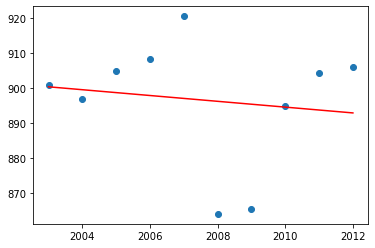

In [171]:
x = year
y = activity_hours_per_yr
x, y = np.array(x), np.array(y)

model = LinearRegression().fit(x, y)

y_pred = model.predict(x)  

plt.scatter(x, y)
plt.plot(x, y_pred, color='red')
plt.show()

In [172]:
coefficient_of_determination = model.score(x,y) #R sqaure value 
coefficient_of_determination

0.019000517217515056

In [173]:
all_act_2012_nonres_nilf_slope = model.coef_
all_act_2012_nonres_nilf_slope

array([[-0.83005099]])

#### 2003 -2019 Regression

In [174]:
year = np.array([2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010,2011,2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019]).reshape((-1, 1))
activity_hours_per_day = np.array([all_act_2003_nonres_nilf_hpd, all_act_2004_nonres_nilf_hpd, all_act_2005_nonres_nilf_hpd,
                                   all_act_2006_nonres_nilf_hpd, all_act_2007_nonres_nilf_hpd, all_act_2008_nonres_nilf_hpd,
                                   all_act_2009_nonres_nilf_hpd, all_act_2010_nonres_nilf_hpd, all_act_2011_nonres_nilf_hpd,
                                   all_act_2012_nonres_nilf_hpd, all_act_2013_nonres_nilf_hpd, all_act_2014_nonres_nilf_hpd,
                                   all_act_2015_nonres_nilf_hpd, all_act_2016_nonres_nilf_hpd, all_act_2017_nonres_nilf_hpd,
                                   all_act_2018_nonres_nilf_hpd, all_act_2019_nonres_nilf_hpd]).reshape((-1, 1))

activity_hours_per_yr = [i * 365 for i in activity_hours_per_day]
#activity_hours_per_yr

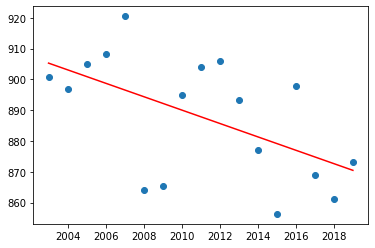

In [175]:
x = year
y = activity_hours_per_yr
x, y = np.array(x), np.array(y)

model = LinearRegression().fit(x, y)

y_pred = model.predict(x)  

plt.scatter(x, y)
plt.plot(x, y_pred, color='red')
plt.show()

In [176]:
coefficient_of_determination = model.score(x,y) #R sqaure value 
coefficient_of_determination

0.30778620897100506

In [177]:
all_act_2019_nonres_nilf_slope = model.coef_
all_act_2019_nonres_nilf_slope

array([[-2.17596028]])

## 2003-2019 Transportation - Not In Labor Force

### 2003 Transportation

In [178]:
#transporation = 12, 13. 12 = Car, truck, or motorcycle (driver), 13= Car, truck, or motorcycle (passager)

In [179]:
transpoartion_location = [12,13]
atus_multi_yr_tran_nilf = multi_merged_nilf[multi_merged_nilf["TEWHERE"].isin(transpoartion_location)]
#atus_multi_yr_tran_nilf

In [180]:
#atus transportation nilf population seperated by year
atus_2003_tran_nilf = atus_multi_yr_tran_nilf[atus_multi_yr_tran_nilf["TUCASEID"].apply(str).str.startswith("2003")]
atus_2004_tran_nilf = atus_multi_yr_tran_nilf[atus_multi_yr_tran_nilf["TUCASEID"].apply(str).str.startswith("2004")]
atus_2005_tran_nilf = atus_multi_yr_tran_nilf[atus_multi_yr_tran_nilf["TUCASEID"].apply(str).str.startswith("2005")]
atus_2006_tran_nilf = atus_multi_yr_tran_nilf[atus_multi_yr_tran_nilf["TUCASEID"].apply(str).str.startswith("2006")]
atus_2007_tran_nilf = atus_multi_yr_tran_nilf[atus_multi_yr_tran_nilf["TUCASEID"].apply(str).str.startswith("2007")]
atus_2008_tran_nilf = atus_multi_yr_tran_nilf[atus_multi_yr_tran_nilf["TUCASEID"].apply(str).str.startswith("2008")]
atus_2009_tran_nilf = atus_multi_yr_tran_nilf[atus_multi_yr_tran_nilf["TUCASEID"].apply(str).str.startswith("2009")]
atus_2010_tran_nilf = atus_multi_yr_tran_nilf[atus_multi_yr_tran_nilf["TUCASEID"].apply(str).str.startswith("2010")]
atus_2011_tran_nilf = atus_multi_yr_tran_nilf[atus_multi_yr_tran_nilf["TUCASEID"].apply(str).str.startswith("2011")]
atus_2012_tran_nilf = atus_multi_yr_tran_nilf[atus_multi_yr_tran_nilf["TUCASEID"].apply(str).str.startswith("2012")]
atus_2013_tran_nilf = atus_multi_yr_tran_nilf[atus_multi_yr_tran_nilf["TUCASEID"].apply(str).str.startswith("2013")]
atus_2014_tran_nilf = atus_multi_yr_tran_nilf[atus_multi_yr_tran_nilf["TUCASEID"].apply(str).str.startswith("2014")]
atus_2015_tran_nilf = atus_multi_yr_tran_nilf[atus_multi_yr_tran_nilf["TUCASEID"].apply(str).str.startswith("2015")]
atus_2016_tran_nilf = atus_multi_yr_tran_nilf[atus_multi_yr_tran_nilf["TUCASEID"].apply(str).str.startswith("2016")]
atus_2017_tran_nilf = atus_multi_yr_tran_nilf[atus_multi_yr_tran_nilf["TUCASEID"].apply(str).str.startswith("2017")]
atus_2018_tran_nilf = atus_multi_yr_tran_nilf[atus_multi_yr_tran_nilf["TUCASEID"].apply(str).str.startswith("2018")]
atus_2019_tran_nilf = atus_multi_yr_tran_nilf[atus_multi_yr_tran_nilf["TUCASEID"].apply(str).str.startswith("2019")]
#atus_2003_tran_nilf

In [181]:
atus_2003_tran_nilf = atus_2003_tran_nilf.groupby(["TUCASEID"]).sum().filter(["TUCASEID", "TUACTDUR24"])
#atus_2003_tran_nilf

In [182]:
atus_2003_tran_nilf_merge = pd.merge(atus_2003_tran_nilf, multi_resp, on= "TUCASEID").filter(["TUCASEID","TUACTDUR24","TUFNWGTP"])
#atus_2003_tran_nilf_merge

In [183]:
atus_2003_tran_nilf_merge["Multiplied Weight"] = atus_2003_tran_nilf_merge["TUACTDUR24"] * atus_2003_tran_nilf_merge["TUFNWGTP"]
#atus_2003_tran_nilf_merge

In [184]:
atus_2003_tran_nilf_multiplied_weight = atus_2003_tran_nilf_merge["Multiplied Weight"].sum()
atus_2003_tran_nilf_multiplied_weight

1281080687654.3047

In [185]:
atus_2003_tran_nilf_hpd = atus_2003_tran_nilf_multiplied_weight / atus_2003_nilf_weight / 60
atus_2003_tran_nilf_hpd

0.8661413939776131

### 2004 Transportation

In [186]:
atus_2004_tran_nilf = atus_2004_tran_nilf.groupby(["TUCASEID"]).sum().filter(["TUCASEID", "TUACTDUR24"])
atus_2004_tran_nilf_merge = pd.merge(atus_2004_tran_nilf, multi_resp, on= "TUCASEID").filter(["TUCASEID","TUACTDUR24","TUFNWGTP"])
#atus_2004_tran_nilf_merge

In [187]:
atus_2004_tran_nilf_merge["Multiplied Weight"] = atus_2004_tran_nilf_merge["TUACTDUR24"] * atus_2004_tran_nilf_merge["TUFNWGTP"]
atus_2004_tran_nilf_multiplied_weight = atus_2004_tran_nilf_merge["Multiplied Weight"].sum()
atus_2004_tran_nilf_multiplied_weight

1306416061038.8867

In [188]:
atus_2004_tran_nilf_hpd = atus_2004_tran_nilf_multiplied_weight / atus_2004_nilf_weight / 60
atus_2004_tran_nilf_hpd

0.8493486123877554

### 2005 Transportation

In [189]:
atus_2005_tran_nilf = atus_2005_tran_nilf.groupby(["TUCASEID"]).sum().filter(["TUCASEID", "TUACTDUR24"])
atus_2005_tran_nilf_merge = pd.merge(atus_2005_tran_nilf, multi_resp, on= "TUCASEID").filter(["TUCASEID","TUACTDUR24","TUFNWGTP"])
#atus_2005_tran_nilf_merge

In [190]:
atus_2005_tran_nilf_merge["Multiplied Weight"] = atus_2005_tran_nilf_merge["TUACTDUR24"] * atus_2005_tran_nilf_merge["TUFNWGTP"]
atus_2005_tran_nilf_multiplied_weight = atus_2005_tran_nilf_merge["Multiplied Weight"].sum()
atus_2005_tran_nilf_multiplied_weight

1327196813200.7969

In [191]:
atus_2005_tran_nilf_hpd = atus_2005_tran_nilf_multiplied_weight / atus_2005_nilf_weight / 60
atus_2005_tran_nilf_hpd

0.8773754466625897

### 2006 Transportation

In [192]:
atus_2006_tran_nilf = atus_2006_tran_nilf.groupby(["TUCASEID"]).sum().filter(["TUCASEID", "TUACTDUR24"])
atus_2006_tran_nilf_merge = pd.merge(atus_2006_tran_nilf, multi_resp, on= "TUCASEID").filter(["TUCASEID","TUACTDUR24","TUFNWGTP"])
#atus_2006_tran_nilf_merge

In [193]:
atus_2006_tran_nilf_merge["Multiplied Weight"] = atus_2006_tran_nilf_merge["TUACTDUR24"] * atus_2006_tran_nilf_merge["TUFNWGTP"]
atus_2006_tran_nilf_multiplied_weight = atus_2006_tran_nilf_merge["Multiplied Weight"].sum()
atus_2006_tran_nilf_multiplied_weight

1292976511959.92

In [194]:
atus_2006_tran_nilf_hpd = atus_2006_tran_nilf_multiplied_weight / atus_2006_nilf_weight / 60
atus_2006_tran_nilf_hpd

0.8307689327225454

### 2007 Transportation

In [195]:
atus_2007_tran_nilf = atus_2007_tran_nilf.groupby(["TUCASEID"]).sum().filter(["TUCASEID", "TUACTDUR24"])
atus_2007_tran_nilf_merge = pd.merge(atus_2007_tran_nilf, multi_resp, on= "TUCASEID").filter(["TUCASEID","TUACTDUR24","TUFNWGTP"])
#atus_2007_tran_nilf_merge

In [196]:
atus_2007_tran_nilf_merge["Multiplied Weight"] = atus_2007_tran_nilf_merge["TUACTDUR24"] * atus_2007_tran_nilf_merge["TUFNWGTP"]
atus_2007_tran_nilf_multiplied_weight = atus_2007_tran_nilf_merge["Multiplied Weight"].sum()
atus_2007_tran_nilf_multiplied_weight

1304658214591.2434

In [197]:
atus_2007_tran_nilf_hpd = atus_2007_tran_nilf_multiplied_weight / atus_2007_nilf_weight / 60
atus_2007_tran_nilf_hpd

0.8500305679971379

### 2008 Transportation

In [198]:
atus_2008_tran_nilf = atus_2008_tran_nilf.groupby(["TUCASEID"]).sum().filter(["TUCASEID", "TUACTDUR24"])
atus_2008_tran_nilf_merge = pd.merge(atus_2008_tran_nilf, multi_resp, on= "TUCASEID").filter(["TUCASEID","TUACTDUR24","TUFNWGTP"])
#atus_2008_tran_nilf_merge

In [199]:
atus_2008_tran_nilf_merge["Multiplied Weight"] = atus_2008_tran_nilf_merge["TUACTDUR24"] * atus_2008_tran_nilf_merge["TUFNWGTP"]
atus_2008_tran_nilf_multiplied_weight = atus_2008_tran_nilf_merge["Multiplied Weight"].sum()
atus_2008_tran_nilf_multiplied_weight

1241686109596.4324

In [200]:
atus_2008_tran_nilf_hpd = atus_2008_tran_nilf_multiplied_weight / atus_2008_nilf_weight / 60
atus_2008_tran_nilf_hpd

0.8076083897123815

### 2009 Transportation

In [201]:
atus_2009_tran_nilf = atus_2009_tran_nilf.groupby(["TUCASEID"]).sum().filter(["TUCASEID", "TUACTDUR24"])
atus_2009_tran_nilf_merge = pd.merge(atus_2009_tran_nilf, multi_resp, on= "TUCASEID").filter(["TUCASEID","TUACTDUR24","TUFNWGTP"])
#atus_2009_tran_nilf_merge

In [202]:
atus_2009_tran_nilf_merge["Multiplied Weight"] = atus_2009_tran_nilf_merge["TUACTDUR24"] * atus_2009_tran_nilf_merge["TUFNWGTP"]
atus_2009_tran_nilf_multiplied_weight = atus_2009_tran_nilf_merge["Multiplied Weight"].sum()
atus_2009_tran_nilf_multiplied_weight

1277846882289.8745

In [203]:
atus_2009_tran_nilf_hpd = atus_2009_tran_nilf_multiplied_weight / atus_2009_nilf_weight / 60
atus_2009_tran_nilf_hpd

0.8049633865468043

### 2010 Transportation

In [204]:
atus_2010_tran_nilf = atus_2010_tran_nilf.groupby(["TUCASEID"]).sum().filter(["TUCASEID", "TUACTDUR24"])
atus_2010_tran_nilf_merge = pd.merge(atus_2010_tran_nilf, multi_resp, on= "TUCASEID").filter(["TUCASEID","TUACTDUR24","TUFNWGTP"])
#atus_2010_tran_nilf_merge

In [205]:
atus_2010_tran_nilf_merge["Multiplied Weight"] = atus_2010_tran_nilf_merge["TUACTDUR24"] * atus_2010_tran_nilf_merge["TUFNWGTP"]
atus_2010_tran_nilf_multiplied_weight = atus_2010_tran_nilf_merge["Multiplied Weight"].sum()
atus_2010_tran_nilf_multiplied_weight

1268220109655.4707

In [206]:
atus_2010_tran_nilf_hpd = atus_2010_tran_nilf_multiplied_weight / atus_2010_nilf_weight / 60
atus_2010_tran_nilf_hpd

0.7718409276464556

### 2011 Transportation

In [207]:
atus_2011_tran_nilf = atus_2011_tran_nilf.groupby(["TUCASEID"]).sum().filter(["TUCASEID", "TUACTDUR24"])
atus_2011_tran_nilf_merge = pd.merge(atus_2011_tran_nilf, multi_resp, on= "TUCASEID").filter(["TUCASEID","TUACTDUR24","TUFNWGTP"])
#atus_2011_tran_nilf_merge

In [208]:
atus_2011_tran_nilf_merge["Multiplied Weight"] = atus_2011_tran_nilf_merge["TUACTDUR24"] * atus_2011_tran_nilf_merge["TUFNWGTP"]
atus_2011_tran_nilf_multiplied_weight = atus_2011_tran_nilf_merge["Multiplied Weight"].sum()
atus_2011_tran_nilf_multiplied_weight

1365638386692.0088

In [209]:
atus_2011_tran_nilf_hpd = atus_2011_tran_nilf_multiplied_weight / atus_2011_nilf_weight / 60
atus_2011_tran_nilf_hpd

0.8145991425543144

### 2012 Transportation

In [210]:
atus_2012_tran_nilf = atus_2012_tran_nilf.groupby(["TUCASEID"]).sum().filter(["TUCASEID", "TUACTDUR24"])
atus_2012_tran_nilf_merge = pd.merge(atus_2012_tran_nilf, multi_resp, on= "TUCASEID").filter(["TUCASEID","TUACTDUR24","TUFNWGTP"])
#atus_2012_tran_nilf_merge

In [211]:
atus_2012_tran_nilf_merge["Multiplied Weight"] = atus_2012_tran_nilf_merge["TUACTDUR24"] * atus_2012_tran_nilf_merge["TUFNWGTP"]
atus_2012_tran_nilf_multiplied_weight = atus_2012_tran_nilf_merge["Multiplied Weight"].sum()
atus_2012_tran_nilf_multiplied_weight

1447200106140.5337

In [212]:
atus_2012_tran_nilf_hpd = atus_2012_tran_nilf_multiplied_weight / atus_2012_nilf_weight / 60
atus_2012_tran_nilf_hpd

0.8118747547624146

### 2013 Transportation

In [213]:
atus_2013_tran_nilf = atus_2013_tran_nilf.groupby(["TUCASEID"]).sum().filter(["TUCASEID", "TUACTDUR24"])
atus_2013_tran_nilf_merge = pd.merge(atus_2013_tran_nilf, multi_resp, on= "TUCASEID").filter(["TUCASEID","TUACTDUR24","TUFNWGTP"])
#atus_2013_tran_nilf_merge

In [214]:
atus_2013_tran_nilf_merge["Multiplied Weight"] = atus_2013_tran_nilf_merge["TUACTDUR24"] * atus_2013_tran_nilf_merge["TUFNWGTP"]
atus_2013_tran_nilf_multiplied_weight = atus_2013_tran_nilf_merge["Multiplied Weight"].sum()
atus_2013_tran_nilf_multiplied_weight

1472940193595.128

In [215]:
atus_2013_tran_nilf_hpd = atus_2013_tran_nilf_multiplied_weight / atus_2013_nilf_weight / 60
atus_2013_tran_nilf_hpd

0.8035592878234715

### 2014 Transportation

In [216]:
atus_2014_tran_nilf = atus_2014_tran_nilf.groupby(["TUCASEID"]).sum().filter(["TUCASEID", "TUACTDUR24"])
atus_2014_tran_nilf_merge = pd.merge(atus_2014_tran_nilf, multi_resp, on= "TUCASEID").filter(["TUCASEID","TUACTDUR24","TUFNWGTP"])
#atus_2014_tran_nilf_merge

In [217]:
atus_2014_tran_nilf_merge["Multiplied Weight"] = atus_2014_tran_nilf_merge["TUACTDUR24"] * atus_2014_tran_nilf_merge["TUFNWGTP"]
atus_2014_tran_nilf_multiplied_weight = atus_2014_tran_nilf_merge["Multiplied Weight"].sum()
atus_2014_tran_nilf_multiplied_weight

1434921109334.1982

In [218]:
atus_2014_tran_nilf_hpd = atus_2014_tran_nilf_multiplied_weight / atus_2014_nilf_weight / 60
atus_2014_tran_nilf_hpd

0.7724429558704683

### 2015 Transportation

In [219]:
atus_2015_tran_nilf = atus_2015_tran_nilf.groupby(["TUCASEID"]).sum().filter(["TUCASEID", "TUACTDUR24"])
atus_2015_tran_nilf_merge = pd.merge(atus_2015_tran_nilf, multi_resp, on= "TUCASEID").filter(["TUCASEID","TUACTDUR24","TUFNWGTP"])
#atus_2015_tran_nilf_merge

In [220]:
atus_2015_tran_nilf_merge["Multiplied Weight"] = atus_2015_tran_nilf_merge["TUACTDUR24"] * atus_2015_tran_nilf_merge["TUFNWGTP"]
atus_2015_tran_nilf_multiplied_weight = atus_2015_tran_nilf_merge["Multiplied Weight"].sum()
atus_2015_tran_nilf_multiplied_weight

1492120812986.559

In [221]:
atus_2015_tran_nilf_hpd = atus_2015_tran_nilf_multiplied_weight / atus_2015_nilf_weight / 60
atus_2015_tran_nilf_hpd

0.7986854341224378

### 2016 Transportation

In [222]:
atus_2016_tran_nilf = atus_2016_tran_nilf.groupby(["TUCASEID"]).sum().filter(["TUCASEID", "TUACTDUR24"])
atus_2016_tran_nilf_merge = pd.merge(atus_2016_tran_nilf, multi_resp, on= "TUCASEID").filter(["TUCASEID","TUACTDUR24","TUFNWGTP"])
#atus_2016_tran_nilf_merge

In [223]:
atus_2016_tran_nilf_merge["Multiplied Weight"] = atus_2016_tran_nilf_merge["TUACTDUR24"] * atus_2016_tran_nilf_merge["TUFNWGTP"]
atus_2016_tran_nilf_multiplied_weight = atus_2016_tran_nilf_merge["Multiplied Weight"].sum()
atus_2016_tran_nilf_multiplied_weight

1591426239578.5596

In [224]:
atus_2016_tran_nilf_hpd = atus_2016_tran_nilf_multiplied_weight / atus_2016_nilf_weight / 60
atus_2016_tran_nilf_hpd

0.8476141079925452

### 2017 Transportation

In [225]:
atus_2017_tran_nilf = atus_2017_tran_nilf.groupby(["TUCASEID"]).sum().filter(["TUCASEID", "TUACTDUR24"])
atus_2017_tran_nilf_merge = pd.merge(atus_2017_tran_nilf, multi_resp, on= "TUCASEID").filter(["TUCASEID","TUACTDUR24","TUFNWGTP"])
#atus_2017_tran_nilf_merge

In [226]:
atus_2017_tran_nilf_merge["Multiplied Weight"] = atus_2017_tran_nilf_merge["TUACTDUR24"] * atus_2017_tran_nilf_merge["TUFNWGTP"]
atus_2017_tran_nilf_multiplied_weight = atus_2017_tran_nilf_merge["Multiplied Weight"].sum()
atus_2017_tran_nilf_multiplied_weight

1515276453209.0557

In [227]:
atus_2017_tran_nilf_hpd = atus_2017_tran_nilf_multiplied_weight / atus_2017_nilf_weight / 60
atus_2017_tran_nilf_hpd

0.7940394289646385

### 2018 Transportation

In [228]:
atus_2018_tran_nilf = atus_2018_tran_nilf.groupby(["TUCASEID"]).sum().filter(["TUCASEID", "TUACTDUR24"])
atus_2018_tran_nilf_merge = pd.merge(atus_2018_tran_nilf, multi_resp, on= "TUCASEID").filter(["TUCASEID","TUACTDUR24","TUFNWGTP"])
#atus_2018_tran_nilf_merge

In [229]:
atus_2018_tran_nilf_merge["Multiplied Weight"] = atus_2018_tran_nilf_merge["TUACTDUR24"] * atus_2018_tran_nilf_merge["TUFNWGTP"]
atus_2018_tran_nilf_multiplied_weight = atus_2018_tran_nilf_merge["Multiplied Weight"].sum()
atus_2018_tran_nilf_multiplied_weight

1576234928437.1748

In [230]:
atus_2018_tran_nilf_hpd = atus_2018_tran_nilf_multiplied_weight / atus_2018_nilf_weight / 60
atus_2018_tran_nilf_hpd

0.8258857019254009

### 2019 Transportation

In [231]:
atus_2019_tran_nilf = atus_2019_tran_nilf.groupby(["TUCASEID"]).sum().filter(["TUCASEID", "TUACTDUR24"])
atus_2019_tran_nilf_merge = pd.merge(atus_2019_tran_nilf, multi_resp, on= "TUCASEID").filter(["TUCASEID","TUACTDUR24","TUFNWGTP"])
#atus_2019_tran_nilf_merge

In [232]:
atus_2019_tran_nilf_merge["Multiplied Weight"] = atus_2019_tran_nilf_merge["TUACTDUR24"] * atus_2019_tran_nilf_merge["TUFNWGTP"]
atus_2019_tran_nilf_multiplied_weight = atus_2019_tran_nilf_merge["Multiplied Weight"].sum()
atus_2019_tran_nilf_multiplied_weight

1534526055223.3408

In [233]:
atus_2019_tran_nilf_hpd = atus_2019_tran_nilf_multiplied_weight / atus_2019_nilf_weight / 60
atus_2019_tran_nilf_hpd

0.7980118276301839

### Regresssion: Transportation - Not In Labor Force

#### 2003 -2012 Regression

In [234]:
year = np.array([2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010,2011,2012]).reshape((-1, 1))
activity_hours_per_day = np.array([atus_2003_tran_nilf_hpd, atus_2004_tran_nilf_hpd, atus_2005_tran_nilf_hpd,
                                   atus_2006_tran_nilf_hpd, atus_2007_tran_nilf_hpd, atus_2008_tran_nilf_hpd,
                                   atus_2009_tran_nilf_hpd, atus_2010_tran_nilf_hpd, atus_2011_tran_nilf_hpd,
                                   atus_2012_tran_nilf_hpd]).reshape((-1, 1))

activity_hours_per_yr = [i * 365 for i in activity_hours_per_day]
#activity_hours_per_yr

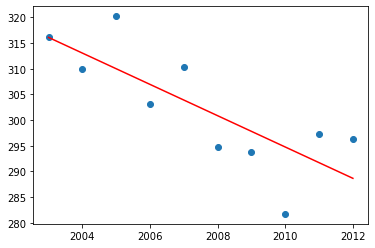

In [235]:
x = year
y = activity_hours_per_yr
x, y = np.array(x), np.array(y)

model = LinearRegression().fit(x, y)

y_pred = model.predict(x)  

plt.scatter(x, y)
plt.plot(x, y_pred, color='red')
plt.show()

In [236]:
coefficient_of_determination = model.score(x,y) #R sqaure value 
coefficient_of_determination

0.6145266512089316

In [237]:
tran_2012_nilf_slope = model.coef_
tran_2012_nilf_slope

array([[-3.05086346]])

#### 2003 -2019 Regression

In [238]:
year = np.array([2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010,2011,2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019]).reshape((-1, 1))
activity_hours_per_day = np.array([atus_2003_tran_nilf_hpd, atus_2004_tran_nilf_hpd, atus_2005_tran_nilf_hpd,
                                   atus_2006_tran_nilf_hpd, atus_2007_tran_nilf_hpd, atus_2008_tran_nilf_hpd,
                                   atus_2009_tran_nilf_hpd, atus_2010_tran_nilf_hpd, atus_2011_tran_nilf_hpd,
                                   atus_2012_tran_nilf_hpd, atus_2013_tran_nilf_hpd, atus_2014_tran_nilf_hpd,
                                   atus_2015_tran_nilf_hpd, atus_2016_tran_nilf_hpd, atus_2017_tran_nilf_hpd,
                                   atus_2018_tran_nilf_hpd, atus_2019_tran_nilf_hpd]).reshape((-1, 1))

activity_hours_per_yr = [i * 365 for i in activity_hours_per_day]
#activity_hours_per_yr

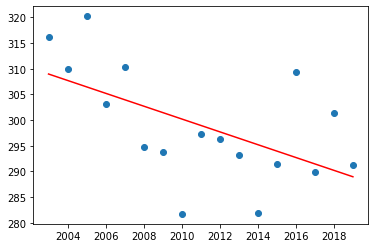

In [239]:
x = year
y = activity_hours_per_yr
x, y = np.array(x), np.array(y)

model = LinearRegression().fit(x, y)

y_pred = model.predict(x)  

plt.scatter(x, y)
plt.plot(x, y_pred, color='red')
plt.show()

In [240]:
coefficient_of_determination = model.score(x,y) #R sqaure value 
coefficient_of_determination

0.31921700268325426

In [241]:
tran_2019_nilf_slope = model.coef_
tran_2019_nilf_slope

array([[-1.2513044]])

### 2003-2019 - Unspecified- Not In Labor Force

In [242]:
#unspecified = 89, 89 = Unspecified place

In [243]:
unspecified_location = [89]
atus_multi_yr_unsp_nilf = multi_merged_nilf[multi_merged_nilf["TEWHERE"].isin(unspecified_location)]
atus_multi_yr_unsp_nilf

,TUCASEID,TUACTDUR24,TUCUMDUR,TRTIER1P,TRTIER2P,TRCODEP,TEWHERE,TELFS,TUFNWGTP,TUSTARTTIM,TUSTOPTIME,TUYEAR
1516,20030101031197,2,282,03,0301,030111,89,5,1.471647e+06,08:40:00,08:42:00,2003
1518,20030101031197,1,285,04,0401,040112,89,5,1.471647e+06,08:44:00,08:45:00,2003
3588,20030101032616,10,750,04,0405,040508,89,5,1.387219e+06,16:20:00,16:30:00,2003
5618,20030111020813,60,668,04,0405,040507,89,5,6.246935e+06,14:08:00,15:08:00,2003
7267,20030111021858,34,290,03,0301,030111,89,5,2.801341e+06,08:16:00,08:50:00,2003
...,...,...,...,...,...,...,...,...,...,...,...,...
4111789,20191211191142,3,868,03,0305,030503,89,5,5.187372e+06,18:25:00,18:28:00,2019
4114300,20191211191655,90,630,13,1301,130131,89,5,9.197335e+06,13:00:00,14:30:00,2019
4115569,20191211191865,40,510,04,0401,040111,89,5,7.856008e+06,11:50:00,12:30:00,2019
4115570,20191211191865,10,520,04,0401,040112,89,5,7.856008e+06,12:30:00,12:40:00,2019


In [244]:
#atus transportation nilf population seperated by year
#unsp = unspecified
atus_2003_unsp_nilf = atus_multi_yr_unsp_nilf[atus_multi_yr_unsp_nilf["TUCASEID"].apply(str).str.startswith("2003")]
atus_2004_unsp_nilf = atus_multi_yr_unsp_nilf[atus_multi_yr_unsp_nilf["TUCASEID"].apply(str).str.startswith("2004")]
atus_2005_unsp_nilf = atus_multi_yr_unsp_nilf[atus_multi_yr_unsp_nilf["TUCASEID"].apply(str).str.startswith("2005")]
atus_2006_unsp_nilf = atus_multi_yr_unsp_nilf[atus_multi_yr_unsp_nilf["TUCASEID"].apply(str).str.startswith("2006")]
atus_2007_unsp_nilf = atus_multi_yr_unsp_nilf[atus_multi_yr_unsp_nilf["TUCASEID"].apply(str).str.startswith("2007")]
atus_2008_unsp_nilf = atus_multi_yr_unsp_nilf[atus_multi_yr_unsp_nilf["TUCASEID"].apply(str).str.startswith("2008")]
atus_2009_unsp_nilf = atus_multi_yr_unsp_nilf[atus_multi_yr_unsp_nilf["TUCASEID"].apply(str).str.startswith("2009")]
atus_2010_unsp_nilf = atus_multi_yr_unsp_nilf[atus_multi_yr_unsp_nilf["TUCASEID"].apply(str).str.startswith("2010")]
atus_2011_unsp_nilf = atus_multi_yr_unsp_nilf[atus_multi_yr_unsp_nilf["TUCASEID"].apply(str).str.startswith("2011")]
atus_2012_unsp_nilf = atus_multi_yr_unsp_nilf[atus_multi_yr_unsp_nilf["TUCASEID"].apply(str).str.startswith("2012")]
atus_2013_unsp_nilf = atus_multi_yr_unsp_nilf[atus_multi_yr_unsp_nilf["TUCASEID"].apply(str).str.startswith("2013")]
atus_2014_unsp_nilf = atus_multi_yr_unsp_nilf[atus_multi_yr_unsp_nilf["TUCASEID"].apply(str).str.startswith("2014")]
atus_2015_unsp_nilf = atus_multi_yr_unsp_nilf[atus_multi_yr_unsp_nilf["TUCASEID"].apply(str).str.startswith("2015")]
atus_2016_unsp_nilf = atus_multi_yr_unsp_nilf[atus_multi_yr_unsp_nilf["TUCASEID"].apply(str).str.startswith("2016")]
atus_2017_unsp_nilf = atus_multi_yr_unsp_nilf[atus_multi_yr_unsp_nilf["TUCASEID"].apply(str).str.startswith("2017")]
atus_2018_unsp_nilf = atus_multi_yr_unsp_nilf[atus_multi_yr_unsp_nilf["TUCASEID"].apply(str).str.startswith("2018")]
atus_2019_unsp_nilf = atus_multi_yr_unsp_nilf[atus_multi_yr_unsp_nilf["TUCASEID"].apply(str).str.startswith("2019")]
#atus_2003_unsp_nilf
#atus_2004_unsp_nilf["TRCODEP"]

### 2003 Unspecified- Not In Labor Force

In [245]:
atus_2003_unsp_nilf = atus_2003_unsp_nilf.groupby(["TUCASEID"]).sum().filter(["TUCASEID", "TUACTDUR24",])
#atus_2003_unsp_nilf

In [246]:
atus_2003_unsp_nilf_merge = pd.merge(atus_2003_unsp_nilf, multi_resp, on= "TUCASEID").filter(["TUCASEID","TUACTDUR24","TUFNWGTP"])
#atus_2003_unsp_nilf_merge

In [247]:
atus_2003_unsp_nilf_merge["Multiplied Weight"] = atus_2003_unsp_nilf_merge["TUACTDUR24"] * atus_2003_unsp_nilf_merge["TUFNWGTP"]
#atus_2003_unsp_nilf_merge

In [248]:
atus_2003_unsp_nilf_multiplied_weight = atus_2003_unsp_nilf_merge["Multiplied Weight"].sum()
atus_2003_unsp_nilf_multiplied_weight

43428743806.192276

In [249]:
atus_2003_unsp_nilf_hpd = atus_2003_unsp_nilf_multiplied_weight / atus_2003_nilf_weight / 60
atus_2003_unsp_nilf_hpd

0.029362266609347563

### 2004 Unspecified- Not In Labor Force

In [250]:
atus_2004_unsp_nilf = atus_2004_unsp_nilf.groupby(["TUCASEID"]).sum().filter(["TUCASEID", "TUACTDUR24"])
#atus_2004_unsp_nilf

In [251]:
atus_2004_unsp_nilf_merge = pd.merge(atus_2004_unsp_nilf, multi_resp, on= "TUCASEID").filter(["TUCASEID","TUACTDUR24","TUFNWGTP"])

atus_2004_unsp_nilf_merge["Multiplied Weight"] = atus_2004_unsp_nilf_merge["TUACTDUR24"] * atus_2004_unsp_nilf_merge["TUFNWGTP"]

atus_2004_unsp_nilf_multiplied_weight = atus_2004_unsp_nilf_merge["Multiplied Weight"].sum()
atus_2004_unsp_nilf_multiplied_weight

31381039214.145317

In [252]:
atus_2004_unsp_nilf_hpd = atus_2004_unsp_nilf_multiplied_weight / atus_2004_nilf_weight / 60
atus_2004_unsp_nilf_hpd

0.020401955323960684

### 2005 Unspecified- Not In Labor Force

In [253]:
atus_2005_unsp_nilf = atus_2005_unsp_nilf.groupby(["TUCASEID"]).sum().filter(["TUCASEID", "TUACTDUR24"])
#atus_2005_unsp_nilf

In [254]:
atus_2005_unsp_nilf_merge = pd.merge(atus_2005_unsp_nilf, multi_resp, on= "TUCASEID").filter(["TUCASEID","TUACTDUR24","TUFNWGTP"])

atus_2005_unsp_nilf_merge["Multiplied Weight"] = atus_2005_unsp_nilf_merge["TUACTDUR24"] * atus_2005_unsp_nilf_merge["TUFNWGTP"]

atus_2005_unsp_nilf_multiplied_weight = atus_2005_unsp_nilf_merge["Multiplied Weight"].sum()
atus_2005_unsp_nilf_multiplied_weight

28435179281.20034

In [255]:
atus_2005_unsp_nilf_hpd = atus_2005_unsp_nilf_multiplied_weight / atus_2005_nilf_weight / 60
atus_2005_unsp_nilf_hpd

0.018797760719908716

### 2006 Unspecified- Not In Labor Force

In [256]:
atus_2006_unsp_nilf = atus_2006_unsp_nilf.groupby(["TUCASEID"]).sum().filter(["TUCASEID", "TUACTDUR24"])
#atus_2006_unsp_nilf

In [257]:
atus_2006_unsp_nilf_merge = pd.merge(atus_2006_unsp_nilf, multi_resp, on= "TUCASEID").filter(["TUCASEID","TUACTDUR24","TUFNWGTP"])

atus_2006_unsp_nilf_merge["Multiplied Weight"] = atus_2006_unsp_nilf_merge["TUACTDUR24"] * atus_2006_unsp_nilf_merge["TUFNWGTP"]

atus_2006_unsp_nilf_multiplied_weight = atus_2006_unsp_nilf_merge["Multiplied Weight"].sum()
atus_2006_unsp_nilf_multiplied_weight

28988679137.744213

In [258]:
atus_2006_unsp_nilf_hpd = atus_2006_unsp_nilf_multiplied_weight / atus_2006_nilf_weight / 60
atus_2006_unsp_nilf_hpd

0.01862593311288752

### 2007 Unspecified- Not In Labor Force

In [259]:
atus_2007_unsp_nilf = atus_2007_unsp_nilf.groupby(["TUCASEID"]).sum().filter(["TUCASEID", "TUACTDUR24"])
#atus_2007_unsp_nilf

In [260]:
atus_2007_unsp_nilf_merge = pd.merge(atus_2007_unsp_nilf, multi_resp, on= "TUCASEID").filter(["TUCASEID","TUACTDUR24","TUFNWGTP"])

atus_2007_unsp_nilf_merge["Multiplied Weight"] = atus_2007_unsp_nilf_merge["TUACTDUR24"] * atus_2007_unsp_nilf_merge["TUFNWGTP"]

atus_2007_unsp_nilf_multiplied_weight = atus_2007_unsp_nilf_merge["Multiplied Weight"].sum()
atus_2007_unsp_nilf_multiplied_weight

45087449561.38875

In [261]:
atus_2007_unsp_nilf_hpd = atus_2007_unsp_nilf_multiplied_weight / atus_2007_nilf_weight / 60
atus_2007_unsp_nilf_hpd

0.02937605415086988

### 2008 Unspecified- Not In Labor Force

In [262]:
atus_2008_unsp_nilf = atus_2008_unsp_nilf.groupby(["TUCASEID"]).sum().filter(["TUCASEID", "TUACTDUR24"])
#atus_2008_unsp_nilf

In [263]:
atus_2008_unsp_nilf_merge = pd.merge(atus_2008_unsp_nilf, multi_resp, on= "TUCASEID").filter(["TUCASEID","TUACTDUR24","TUFNWGTP"])

atus_2008_unsp_nilf_merge["Multiplied Weight"] = atus_2008_unsp_nilf_merge["TUACTDUR24"] * atus_2008_unsp_nilf_merge["TUFNWGTP"]

atus_2008_unsp_nilf_multiplied_weight = atus_2008_unsp_nilf_merge["Multiplied Weight"].sum()
atus_2008_unsp_nilf_multiplied_weight

29716878291.036324

In [264]:
atus_2008_unsp_nilf_hpd = atus_2008_unsp_nilf_multiplied_weight / atus_2008_nilf_weight / 60
atus_2008_unsp_nilf_hpd

0.019328234437367527

### 2009 Unspecified- Not In Labor Force

In [265]:
atus_2009_unsp_nilf = atus_2009_unsp_nilf.groupby(["TUCASEID"]).sum().filter(["TUCASEID", "TUACTDUR24"])
#atus_2009_unsp_nilf

In [266]:
atus_2009_unsp_nilf_merge = pd.merge(atus_2009_unsp_nilf, multi_resp, on= "TUCASEID").filter(["TUCASEID","TUACTDUR24","TUFNWGTP"])

atus_2009_unsp_nilf_merge["Multiplied Weight"] = atus_2009_unsp_nilf_merge["TUACTDUR24"] * atus_2009_unsp_nilf_merge["TUFNWGTP"]

atus_2009_unsp_nilf_multiplied_weight = atus_2009_unsp_nilf_merge["Multiplied Weight"].sum()
atus_2009_unsp_nilf_multiplied_weight

34017438798.007027

In [267]:
atus_2009_unsp_nilf_hpd = atus_2009_unsp_nilf_multiplied_weight / atus_2009_nilf_weight / 60
atus_2009_unsp_nilf_hpd

0.021428852796058794

### 2010 Unspecified- Not In Labor Force

In [268]:
atus_2010_unsp_nilf = atus_2010_unsp_nilf.groupby(["TUCASEID"]).sum().filter(["TUCASEID", "TUACTDUR24"])
#atus_2010_unsp_nilf

In [269]:
atus_2010_unsp_nilf_merge = pd.merge(atus_2010_unsp_nilf, multi_resp, on= "TUCASEID").filter(["TUCASEID","TUACTDUR24","TUFNWGTP"])

atus_2010_unsp_nilf_merge["Multiplied Weight"] = atus_2010_unsp_nilf_merge["TUACTDUR24"] * atus_2010_unsp_nilf_merge["TUFNWGTP"]

atus_2010_unsp_nilf_multiplied_weight = atus_2010_unsp_nilf_merge["Multiplied Weight"].sum()
atus_2010_unsp_nilf_multiplied_weight

40385024033.45438

In [270]:
atus_2010_unsp_nilf_hpd = atus_2010_unsp_nilf_multiplied_weight / atus_2010_nilf_weight / 60
atus_2010_unsp_nilf_hpd

0.024578394693231767

### 2011 Unspecified- Not In Labor Force

In [271]:
atus_2011_unsp_nilf = atus_2011_unsp_nilf.groupby(["TUCASEID"]).sum().filter(["TUCASEID", "TUACTDUR24"])
#atus_2011_unsp_nilf

In [272]:
atus_2011_unsp_nilf_merge = pd.merge(atus_2011_unsp_nilf, multi_resp, on= "TUCASEID").filter(["TUCASEID","TUACTDUR24","TUFNWGTP"])

atus_2011_unsp_nilf_merge["Multiplied Weight"] = atus_2011_unsp_nilf_merge["TUACTDUR24"] * atus_2011_unsp_nilf_merge["TUFNWGTP"]

atus_2011_unsp_nilf_multiplied_weight = atus_2011_unsp_nilf_merge["Multiplied Weight"].sum()
atus_2011_unsp_nilf_multiplied_weight

31627531969.92402

In [273]:
atus_2011_unsp_nilf_hpd = atus_2011_unsp_nilf_multiplied_weight / atus_2011_nilf_weight / 60
atus_2011_unsp_nilf_hpd

0.018865726589757725

### 2012 Unspecified- Not In Labor Force

In [274]:
atus_2012_unsp_nilf = atus_2012_unsp_nilf.groupby(["TUCASEID"]).sum().filter(["TUCASEID", "TUACTDUR24"])
#atus_2012_unsp_nilf

In [275]:
atus_2012_unsp_nilf_merge = pd.merge(atus_2012_unsp_nilf, multi_resp, on= "TUCASEID").filter(["TUCASEID","TUACTDUR24","TUFNWGTP"])

atus_2012_unsp_nilf_merge["Multiplied Weight"] = atus_2012_unsp_nilf_merge["TUACTDUR24"] * atus_2012_unsp_nilf_merge["TUFNWGTP"]

atus_2012_unsp_nilf_multiplied_weight = atus_2012_unsp_nilf_merge["Multiplied Weight"].sum()
atus_2012_unsp_nilf_multiplied_weight

37592400350.68397

In [276]:
atus_2012_unsp_nilf_hpd = atus_2012_unsp_nilf_multiplied_weight / atus_2012_nilf_weight / 60
atus_2012_unsp_nilf_hpd

0.02108921958072211

### 2013 Unspecified- Not In Labor Force

In [277]:
atus_2013_unsp_nilf = atus_2013_unsp_nilf.groupby(["TUCASEID"]).sum().filter(["TUCASEID", "TUACTDUR24"])
#atus_2013_unsp_nilf

In [278]:
atus_2013_unsp_nilf_merge = pd.merge(atus_2013_unsp_nilf, multi_resp, on= "TUCASEID").filter(["TUCASEID","TUACTDUR24","TUFNWGTP"])

atus_2013_unsp_nilf_merge["Multiplied Weight"] = atus_2013_unsp_nilf_merge["TUACTDUR24"] * atus_2013_unsp_nilf_merge["TUFNWGTP"]

atus_2013_unsp_nilf_multiplied_weight = atus_2013_unsp_nilf_merge["Multiplied Weight"].sum()
atus_2013_unsp_nilf_multiplied_weight

22108156743.83189

In [279]:
atus_2013_unsp_nilf_hpd = atus_2013_unsp_nilf_multiplied_weight / atus_2013_nilf_weight / 60
atus_2013_unsp_nilf_hpd

0.01206105635884794

### 2014 Unspecified- Not In Labor Force

In [280]:
atus_2014_unsp_nilf = atus_2014_unsp_nilf.groupby(["TUCASEID"]).sum().filter(["TUCASEID", "TUACTDUR24"])
#atus_2014_unsp_nilf

In [281]:
atus_2014_unsp_nilf_merge = pd.merge(atus_2014_unsp_nilf, multi_resp, on= "TUCASEID").filter(["TUCASEID","TUACTDUR24","TUFNWGTP"])

atus_2014_unsp_nilf_merge["Multiplied Weight"] = atus_2014_unsp_nilf_merge["TUACTDUR24"] * atus_2014_unsp_nilf_merge["TUFNWGTP"]

atus_2014_unsp_nilf_multiplied_weight = atus_2014_unsp_nilf_merge["Multiplied Weight"].sum()
atus_2014_unsp_nilf_multiplied_weight

31051925821.60458

In [282]:
atus_2014_unsp_nilf_hpd = atus_2014_unsp_nilf_multiplied_weight / atus_2014_nilf_weight / 60
atus_2014_unsp_nilf_hpd

0.016715791001388335

### 2015 Unspecified- Not In Labor Force

In [283]:
atus_2015_unsp_nilf = atus_2015_unsp_nilf.groupby(["TUCASEID"]).sum().filter(["TUCASEID", "TUACTDUR24"])
#atus_2015_unsp_nilf

In [284]:
atus_2015_unsp_nilf_merge = pd.merge(atus_2015_unsp_nilf, multi_resp, on= "TUCASEID").filter(["TUCASEID","TUACTDUR24","TUFNWGTP"])

atus_2015_unsp_nilf_merge["Multiplied Weight"] = atus_2015_unsp_nilf_merge["TUACTDUR24"] * atus_2015_unsp_nilf_merge["TUFNWGTP"]

atus_2015_unsp_nilf_multiplied_weight = atus_2015_unsp_nilf_merge["Multiplied Weight"].sum()
atus_2015_unsp_nilf_multiplied_weight

24977843302.37083

In [285]:
atus_2015_unsp_nilf_hpd = atus_2015_unsp_nilf_multiplied_weight / atus_2015_nilf_weight / 60
atus_2015_unsp_nilf_hpd

0.013369855475352835

### 2016 Unspecified- Not In Labor Force

In [286]:
atus_2016_unsp_nilf = atus_2016_unsp_nilf.groupby(["TUCASEID"]).sum().filter(["TUCASEID", "TUACTDUR24"])
#atus_2016_unsp_nilf

In [287]:
atus_2016_unsp_nilf_merge = pd.merge(atus_2016_unsp_nilf, multi_resp, on= "TUCASEID").filter(["TUCASEID","TUACTDUR24","TUFNWGTP"])

atus_2016_unsp_nilf_merge["Multiplied Weight"] = atus_2016_unsp_nilf_merge["TUACTDUR24"] * atus_2016_unsp_nilf_merge["TUFNWGTP"]

atus_2016_unsp_nilf_multiplied_weight = atus_2016_unsp_nilf_merge["Multiplied Weight"].sum()
atus_2016_unsp_nilf_multiplied_weight

49651383559.75206

In [288]:
atus_2016_unsp_nilf_hpd = atus_2016_unsp_nilf_multiplied_weight / atus_2016_nilf_weight / 60
atus_2016_unsp_nilf_hpd

0.026444966244706346

### 2017 Unspecified- Not In Labor Force

In [289]:
atus_2017_unsp_nilf = atus_2017_unsp_nilf.groupby(["TUCASEID"]).sum().filter(["TUCASEID", "TUACTDUR24"])
#atus_2017_unsp_nilf

In [290]:
atus_2017_unsp_nilf_merge = pd.merge(atus_2017_unsp_nilf, multi_resp, on= "TUCASEID").filter(["TUCASEID","TUACTDUR24","TUFNWGTP"])

atus_2017_unsp_nilf_merge["Multiplied Weight"] = atus_2017_unsp_nilf_merge["TUACTDUR24"] * atus_2017_unsp_nilf_merge["TUFNWGTP"]

atus_2017_unsp_nilf_multiplied_weight = atus_2017_unsp_nilf_merge["Multiplied Weight"].sum()
atus_2017_unsp_nilf_multiplied_weight

45615924424.16437

In [291]:
atus_2017_unsp_nilf_hpd = atus_2017_unsp_nilf_multiplied_weight / atus_2017_nilf_weight / 60
atus_2017_unsp_nilf_hpd

0.023903785018733057

### 2018 Unspecified- Not In Labor Force

In [292]:
atus_2018_unsp_nilf = atus_2018_unsp_nilf.groupby(["TUCASEID"]).sum().filter(["TUCASEID", "TUACTDUR24"])
#atus_2018_unsp_nilf

In [293]:
atus_2018_unsp_nilf_merge = pd.merge(atus_2018_unsp_nilf, multi_resp, on= "TUCASEID").filter(["TUCASEID","TUACTDUR24","TUFNWGTP"])

atus_2018_unsp_nilf_merge["Multiplied Weight"] = atus_2018_unsp_nilf_merge["TUACTDUR24"] * atus_2018_unsp_nilf_merge["TUFNWGTP"]

atus_2018_unsp_nilf_multiplied_weight = atus_2018_unsp_nilf_merge["Multiplied Weight"].sum()
atus_2018_unsp_nilf_multiplied_weight

47047432624.98837

In [294]:
atus_2018_unsp_nilf_hpd = atus_2018_unsp_nilf_multiplied_weight / atus_2018_nilf_weight / 60
atus_2018_unsp_nilf_hpd

0.024651022012183024

### 2019 Unspecified- Not In Labor Force

In [295]:
atus_2019_unsp_nilf = atus_2019_unsp_nilf.groupby(["TUCASEID"]).sum().filter(["TUCASEID", "TUACTDUR24"])
#atus_2019_unsp_nilf

In [296]:
atus_2019_unsp_nilf_merge = pd.merge(atus_2019_unsp_nilf, multi_resp, on= "TUCASEID").filter(["TUCASEID","TUACTDUR24","TUFNWGTP"])

atus_2019_unsp_nilf_merge["Multiplied Weight"] = atus_2019_unsp_nilf_merge["TUACTDUR24"] * atus_2019_unsp_nilf_merge["TUFNWGTP"]

atus_2019_unsp_nilf_multiplied_weight = atus_2019_unsp_nilf_merge["Multiplied Weight"].sum()
atus_2019_unsp_nilf_multiplied_weight

36963271974.552635

In [297]:
atus_2019_unsp_nilf_hpd = atus_2019_unsp_nilf_multiplied_weight / atus_2019_nilf_weight / 60
atus_2019_unsp_nilf_hpd

0.019222305234374907

### Regresssion: Unespecified - Not In Labor Force

#### 2003 -2012 Regression

In [298]:
year = np.array([2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010,2011,2012]).reshape((-1, 1))
activity_hours_per_day = np.array([atus_2003_unsp_nilf_hpd, atus_2004_unsp_nilf_hpd, atus_2005_unsp_nilf_hpd,
                                   atus_2006_unsp_nilf_hpd, atus_2007_unsp_nilf_hpd, atus_2008_unsp_nilf_hpd,
                                   atus_2009_unsp_nilf_hpd, atus_2010_unsp_nilf_hpd, atus_2011_unsp_nilf_hpd,
                                   atus_2012_unsp_nilf_hpd]).reshape((-1, 1))

activity_hours_per_yr = [i * 365 for i in activity_hours_per_day]
#activity_hours_per_yr

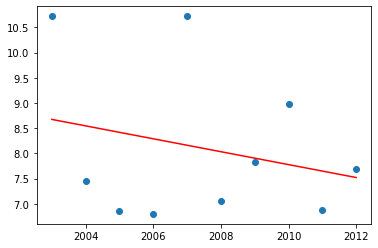

In [299]:
x = year
y = activity_hours_per_yr
x, y = np.array(x), np.array(y)

model = LinearRegression().fit(x, y)

y_pred = model.predict(x)  

plt.scatter(x, y)
plt.plot(x, y_pred, color='red')
plt.show()

In [300]:
coefficient_of_determination = model.score(x,y) #R sqaure value 
coefficient_of_determination

0.06471860840078425

In [301]:
all_act_2012_res_nilf_slope = model.coef_
all_act_2012_res_nilf_slope

array([[-0.1281856]])

#### 2003-2019 Regression

In [302]:
year = np.array([2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010,2011,2012,2013,2014,2015,2016,2017,2018,2019]).reshape((-1, 1))
activity_hours_per_day = np.array([atus_2003_unsp_nilf_hpd, atus_2004_unsp_nilf_hpd, atus_2005_unsp_nilf_hpd,
                                   atus_2006_unsp_nilf_hpd, atus_2007_unsp_nilf_hpd, atus_2008_unsp_nilf_hpd,
                                   atus_2009_unsp_nilf_hpd, atus_2010_unsp_nilf_hpd, atus_2011_unsp_nilf_hpd,
                                   atus_2012_unsp_nilf_hpd, atus_2013_unsp_nilf_hpd, atus_2014_unsp_nilf_hpd,
                                   atus_2015_unsp_nilf_hpd, atus_2016_unsp_nilf_hpd, atus_2017_unsp_nilf_hpd,
                                   atus_2018_unsp_nilf_hpd, atus_2019_unsp_nilf_hpd]).reshape((-1, 1))

activity_hours_per_yr = [i * 365 for i in activity_hours_per_day]
#activity_hours_per_yr

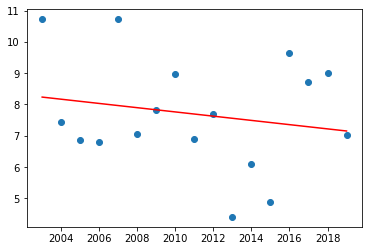

In [303]:
x = year
y = activity_hours_per_yr
x, y = np.array(x), np.array(y)

model = LinearRegression().fit(x, y)

y_pred = model.predict(x)  

plt.scatter(x, y)
plt.plot(x, y_pred, color='red')
plt.show()

In [304]:
coefficient_of_determination = model.score(x,y) #R sqaure value 
coefficient_of_determination

0.03677600909421341

In [305]:
all_act_2019_res_nilf_slope = model.coef_
all_act_2019_res_nilf_slope

array([[-0.06775027]])